In [32]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install xgboost lightgbm scikit-learn mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import os
import pandas as pd

# Changer le répertoire courant
os.chdir(r"C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 6 MLOPS\DATASETP6")

# Afficher les fichiers pour vérifier
print(os.listdir())

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'homecredit_good.csv', 'installments_payments.csv', 'log_reg_baseline.csv', 'mlruns', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


# Chargement des donnees

In [37]:
# Training data
app_train = pd.read_csv("application_train.csv")
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Testing data features
app_test = pd.read_csv("application_test.csv")
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
bur_bal = pd.read_csv("bureau_balance.csv")
print('Testing data shape: ', bur_bal.shape)
bur_bal.head()

Testing data shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [40]:
bur = pd.read_csv("bureau.csv")
print('Testing data shape: ', bur.shape)
bur.head()

Testing data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [41]:
crecard_bal = pd.read_csv("credit_card_balance.csv")
print('Testing data shape: ', crecard_bal.shape)
crecard_bal.head()

Testing data shape:  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [42]:
inst_pay = pd.read_csv("installments_payments.csv")
print('Testing data shape: ', inst_pay.shape)
inst_pay.head()

Testing data shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [43]:
poscash_bal = pd.read_csv("POS_CASH_balance.csv")
print('Testing data shape: ', poscash_bal.shape)
poscash_bal.head()

Testing data shape:  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [44]:
prev_app = pd.read_csv("previous_application.csv")
print('Testing data shape: ', prev_app.shape)
prev_app.head()

Testing data shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
samp_subm = pd.read_csv("sample_submission.csv")
print('Testing data shape: ', samp_subm.shape)
samp_subm.head()

Testing data shape:  (48744, 2)


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [46]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

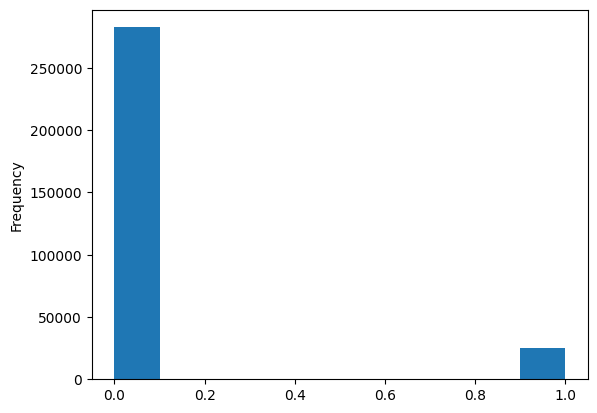

In [47]:
app_train['TARGET'].astype(int).plot.hist();

# Analyse descriptive et Data exploration

In [48]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [49]:
#faire des for loop pour na et format des colonnes

In [50]:
#identifier les colonnes clés pour jointures

In [51]:
datasets = {
    "application_train": app_train,
    "application_test": app_test,
    "bureau": bur,
    "bureau_balance": bur_bal,
    "previous_application": prev_app,
    "POS_CASH_balance": poscash_bal,
    "credit_card_balance": crecard_bal,
    "installments_payments": inst_pay
}

In [52]:
for name, df in datasets.items():
    print(f"=== {name.upper()} ===")
    
    print(">> Missing Values:")
    display(missing_values_table(df))
    
    print(">> Data Types:")
    display(df.dtypes.value_counts())

    print(">> Unique classes in object columns:")
    display(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
  
    print("\n\n\n")  # Pour séparer les blocs visuellement

=== APPLICATION_TRAIN ===
>> Missing Values:
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


>> Data Types:


float64    65
int64      41
object     16
Name: count, dtype: int64

>> Unique classes in object columns:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64





=== APPLICATION_TEST ===
>> Missing Values:
Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,33495,68.7
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1
DEF_60_CNT_SOCIAL_CIRCLE,29,0.1
AMT_ANNUITY,24,0.0


>> Data Types:


float64    65
int64      40
object     16
Name: count, dtype: int64

>> Unique classes in object columns:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64





=== BUREAU ===
>> Missing Values:
Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


>> Data Types:


float64    8
int64      6
object     3
Name: count, dtype: int64

>> Unique classes in object columns:


CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64





=== BUREAU_BALANCE ===
>> Missing Values:
Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


>> Data Types:


int64     2
object    1
Name: count, dtype: int64

>> Unique classes in object columns:


STATUS    8
dtype: int64





=== PREVIOUS_APPLICATION ===
>> Missing Values:
Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,1664263,99.6
RATE_INTEREST_PRIMARY,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_LAST_DUE,673065,40.3
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3


>> Data Types:


object     16
float64    15
int64       6
Name: count, dtype: int64

>> Unique classes in object columns:


NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64





=== POS_CASH_BALANCE ===
>> Missing Values:
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


>> Data Types:


int64      5
float64    2
object     1
Name: count, dtype: int64

>> Unique classes in object columns:


NAME_CONTRACT_STATUS    9
dtype: int64





=== CREDIT_CARD_BALANCE ===
>> Missing Values:
Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


>> Data Types:


float64    15
int64       7
object      1
Name: count, dtype: int64

>> Unique classes in object columns:


NAME_CONTRACT_STATUS    7
dtype: int64





=== INSTALLMENTS_PAYMENTS ===
>> Missing Values:
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


>> Data Types:


float64    5
int64      3
Name: count, dtype: int64

>> Unique classes in object columns:


Series([], dtype: float64)

## Fusion des données 

In [53]:
def aggregate_and_merge(main_df, df_to_agg, main_key, agg_key, prefix):
    """
    Agrège les colonnes numériques de df_to_agg par agg_key
    et fusionne le résultat à main_df via main_key.
    """
    # Garder uniquement les colonnes numériques
    numeric_df = df_to_agg.select_dtypes(include=['number']).copy()

    # Ajouter la clé si absente
    if agg_key not in numeric_df.columns:
        numeric_df[agg_key] = df_to_agg[agg_key]

    # Aggrégation
    agg_funcs = ['count', 'mean', 'max', 'min', 'sum']
    agg_df = numeric_df.groupby(agg_key).agg(agg_funcs)

    # Renommage des colonnes
    agg_df.columns = [f"{prefix}_{col[0]}_{col[1]}" for col in agg_df.columns]
    agg_df.reset_index(inplace=True)

    # Fusion avec suppression éventuelle de la clé
    merged_df = main_df.merge(agg_df, how='left', left_on=main_key, right_on=agg_key)
    if agg_key in merged_df.columns and agg_key != main_key:
        merged_df.drop(columns=agg_key, inplace=True)

    return merged_df


In [54]:
# Étape 1 : Bureau balance → bureau
bur = aggregate_and_merge(bur, bur_bal, 'SK_ID_BUREAU', 'SK_ID_BUREAU', 'BUREAU_BAL')

In [55]:
# Étape 2 : Bureau → application
app_train = aggregate_and_merge(app_train, bur, 'SK_ID_CURR', 'SK_ID_CURR', 'BUREAU')
app_test = aggregate_and_merge(app_test, bur, 'SK_ID_CURR', 'SK_ID_CURR', 'BUREAU')

In [56]:
# Étape 3 : Previous application → application
app_train = aggregate_and_merge(app_train, prev_app, 'SK_ID_CURR', 'SK_ID_CURR', 'PREV')
app_test = aggregate_and_merge(app_test, prev_app, 'SK_ID_CURR', 'SK_ID_CURR', 'PREV')

In [57]:
# Étape 4 : POS_CASH_balance → application
app_train = aggregate_and_merge(app_train, poscash_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'POS')
app_test = aggregate_and_merge(app_test, poscash_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'POS')

In [58]:
# Étape 5 : Credit card balance → application
app_train = aggregate_and_merge(app_train, crecard_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'CRECARD')
app_test = aggregate_and_merge(app_test, crecard_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'CRECARD')

In [59]:
# Étape 6 : Installments payments → application
app_train = aggregate_and_merge(app_train, inst_pay, 'SK_ID_CURR', 'SK_ID_CURR', 'INSTALL')
app_test = aggregate_and_merge(app_test, inst_pay, 'SK_ID_CURR', 'SK_ID_CURR', 'INSTALL')

In [60]:
app_train.shape

(307511, 482)

In [61]:
app_test.shape

(48744, 481)

In [62]:
import os
print(os.getcwd())

C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 6 MLOPS\DATASETP6


In [63]:
# 1. Sauvegarder les fichiers localement
app_train.to_csv("app_train.csv", index=False)
app_test.to_csv("app_test.csv", index=False)

## Exploration du df fusionné

In [64]:
missing_values_table(app_train)

Your selected dataframe has 482 columns.
There are 427 columns that have missing values.


,Missing Values,% of Total Values
PREV_RATE_INTEREST_PRIMARY_min,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_min,302902,98.5
PREV_RATE_INTEREST_PRIMARY_mean,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_mean,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_max,302902,98.5
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [65]:
missing_values_table(app_test)

Your selected dataframe has 481 columns.
There are 424 columns that have missing values.


,Missing Values,% of Total Values
PREV_RATE_INTEREST_PRIVILEGED_min,47632,97.7
PREV_RATE_INTEREST_PRIVILEGED_max,47632,97.7
PREV_RATE_INTEREST_PRIMARY_max,47632,97.7
PREV_RATE_INTEREST_PRIMARY_mean,47632,97.7
PREV_RATE_INTEREST_PRIVILEGED_mean,47632,97.7
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1
DEF_30_CNT_SOCIAL_CIRCLE,29,0.1
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
AMT_ANNUITY,24,0.0


In [66]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [67]:
app_train.dtypes.value_counts()

float64    425
int64       41
object      16
Name: count, dtype: int64

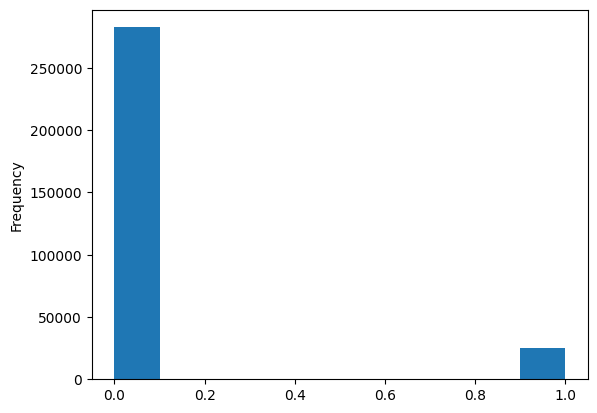

In [68]:
app_train['TARGET'].astype(int).plot.hist();

In [69]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [70]:
# Pourcentage de valeurs manquantes dans chaque colonne
missing_percent = app_train.isnull().mean() * 100

# Colonnes avec plus de 90% de NaN
high_na_columns = missing_percent[missing_percent > 80].sort_values(ascending=False)

# Affichage
print("Colonnes avec plus de 85% de valeurs manquantes :")
print(high_na_columns)


Colonnes avec plus de 85% de valeurs manquantes :
PREV_RATE_INTEREST_PRIMARY_mean            98.501192
PREV_RATE_INTEREST_PRIMARY_max             98.501192
PREV_RATE_INTEREST_PRIMARY_min             98.501192
PREV_RATE_INTEREST_PRIVILEGED_mean         98.501192
PREV_RATE_INTEREST_PRIVILEGED_max          98.501192
PREV_RATE_INTEREST_PRIVILEGED_min          98.501192
CRECARD_AMT_PAYMENT_CURRENT_max            80.143800
CRECARD_AMT_PAYMENT_CURRENT_min            80.143800
CRECARD_AMT_PAYMENT_CURRENT_mean           80.143800
CRECARD_AMT_DRAWINGS_ATM_CURRENT_max       80.117784
CRECARD_AMT_DRAWINGS_ATM_CURRENT_mean      80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_max     80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_mean    80.117784
CRECARD_AMT_DRAWINGS_ATM_CURRENT_min       80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_min     80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_min       80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_max       80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_mean      80.117

In [71]:
# Supprimer toutes les colonnes avec plus de 90 % de NaN
app_train = app_train.loc[:, app_train.isnull().mean() < 0.90]
app_test = app_test.loc[:, app_test.isnull().mean() < 0.90]

In [72]:
app_train.shape

(307511, 476)

## Encodage des variables et alignement

In [73]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [74]:
# one-hot encoding of categorical variables
app_train2 = pd.get_dummies(app_train)
app_test2 = pd.get_dummies(app_test)

print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 597)
Testing Features shape:  (48744, 593)


In [75]:
train_labels = app_train2['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train2, app_test2 = app_train2.align(app_test2, join = 'inner', axis = 1)

# Add the target back in
app_train2['TARGET'] = train_labels

print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 594)
Testing Features shape:  (48744, 593)


# Analyse exploratoire partie 2 

In [76]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [77]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

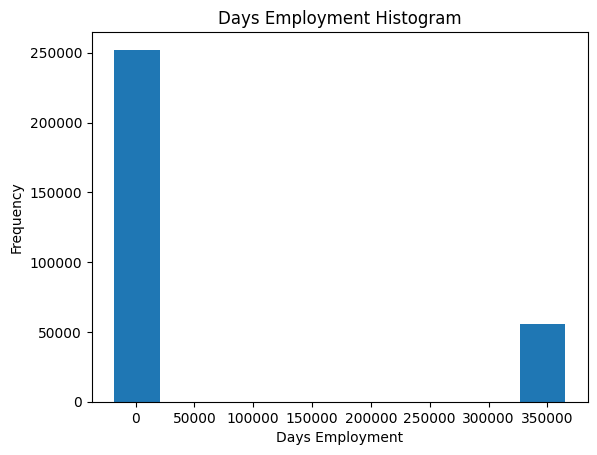

In [78]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## Exploration des anomalies et défauts de paiement

In [79]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


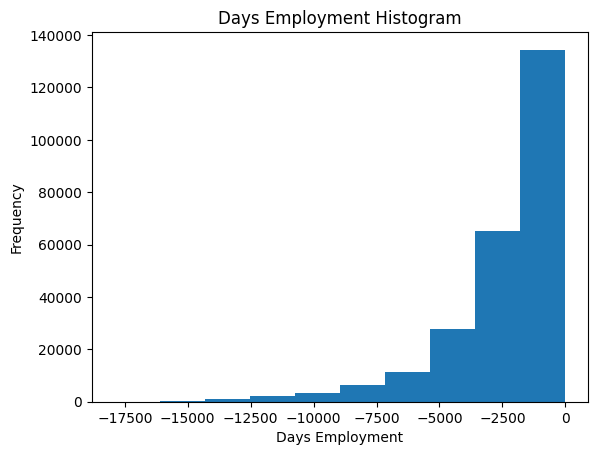

In [80]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [81]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlation 

In [82]:
# Ne garder que les colonnes numériques
numeric_df = app_train.select_dtypes(include=[np.number])

# Calcul des corrélations avec la cible
correlations = numeric_df.corr()['TARGET'].sort_values()

# Affichage des 15 plus fortes corrélations positives et négatives
print('🔺 Most Positive Correlations:\n', correlations.tail(15))
print('\n🔻 Most Negative Correlations:\n', correlations.head(15))


🔺 Most Positive Correlations:
 BUREAU_DAYS_CREDIT_min                        0.075248
BUREAU_BUREAU_BAL_MONTHS_BALANCE_mean_mean    0.076424
DAYS_BIRTH                                    0.078239
CRECARD_CNT_DRAWINGS_CURRENT_mean             0.082520
CRECARD_AMT_RECEIVABLE_PRINCIPAL_mean         0.086062
CRECARD_AMT_RECIVABLE_mean                    0.086478
CRECARD_AMT_TOTAL_RECEIVABLE_mean             0.086490
CRECARD_AMT_BALANCE_mean                      0.087177
BUREAU_BUREAU_BAL_MONTHS_BALANCE_min_mean     0.089038
BUREAU_DAYS_CREDIT_mean                       0.089729
CRECARD_CNT_DRAWINGS_CURRENT_max              0.101389
CRECARD_CNT_DRAWINGS_ATM_CURRENT_mean         0.107692
TARGET                                        1.000000
CRECARD_SK_DPD_min                                 NaN
CRECARD_SK_DPD_DEF_min                             NaN
Name: TARGET, dtype: float64

🔻 Most Negative Correlations:
 EXT_SOURCE_3                                  -0.178919
EXT_SOURCE_2               

In [83]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982709)

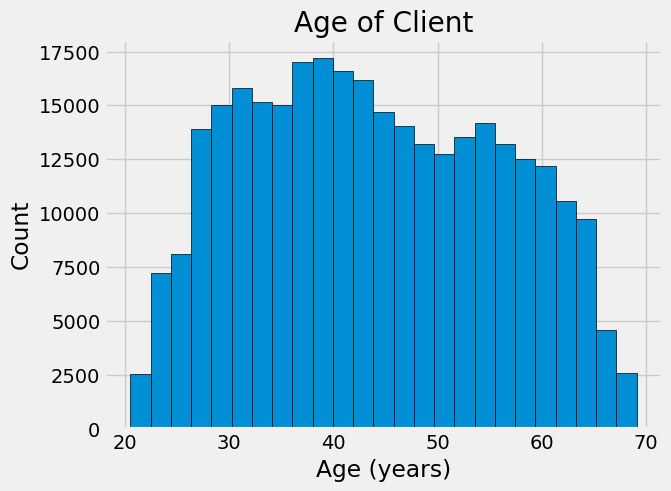

In [84]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

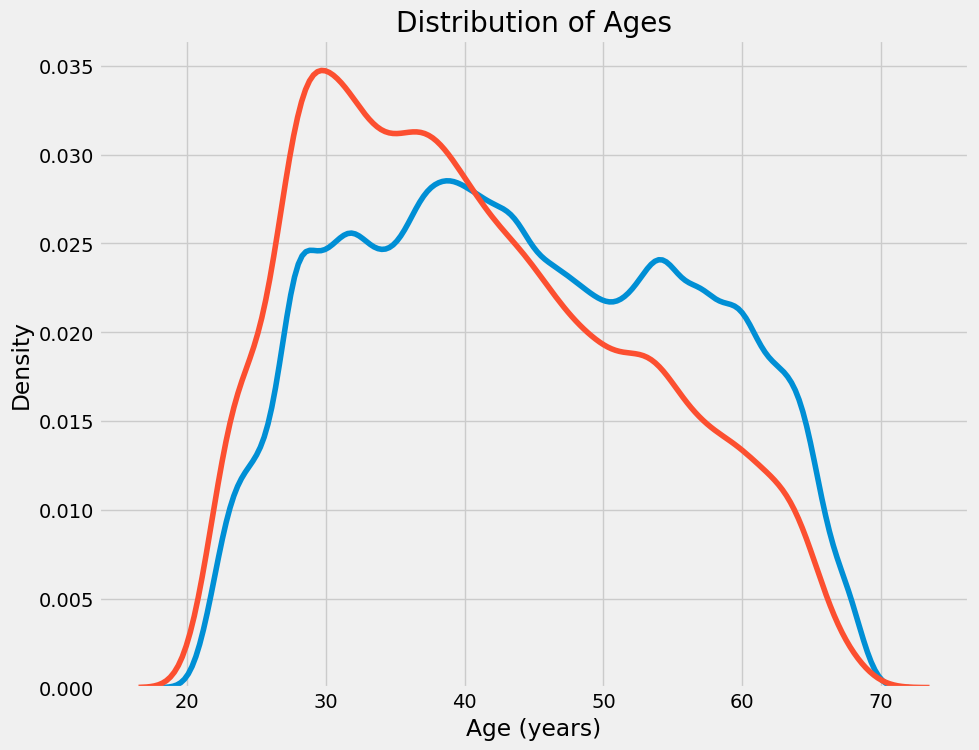

In [85]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [86]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [87]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


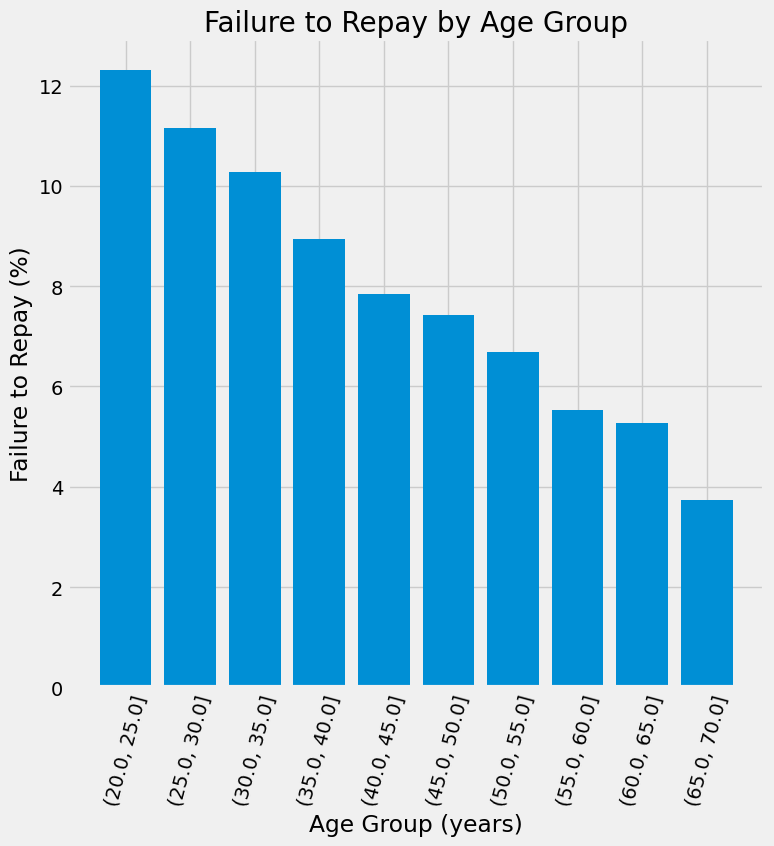

In [88]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## EXT SOURCE correlations

In [89]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


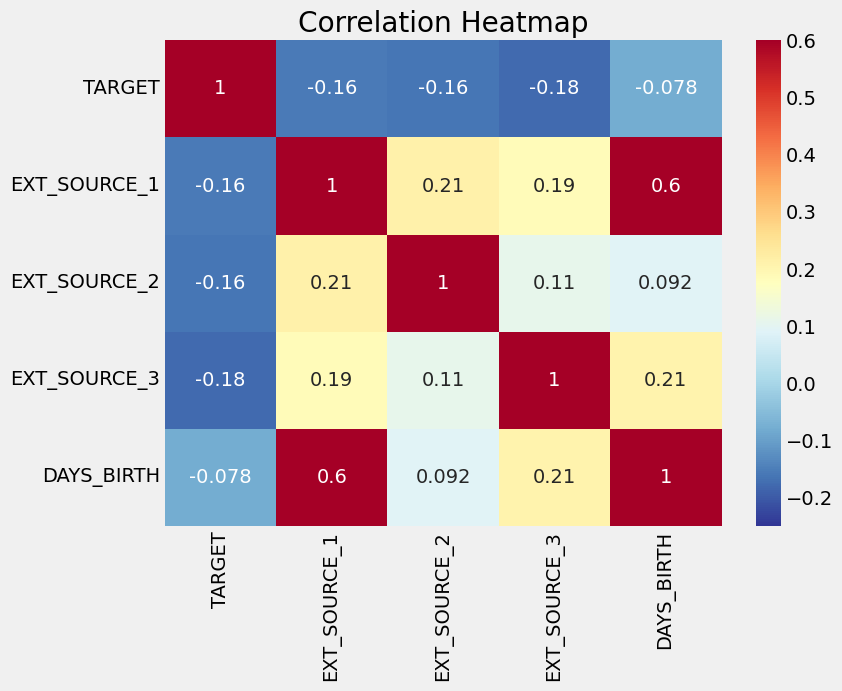

In [90]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

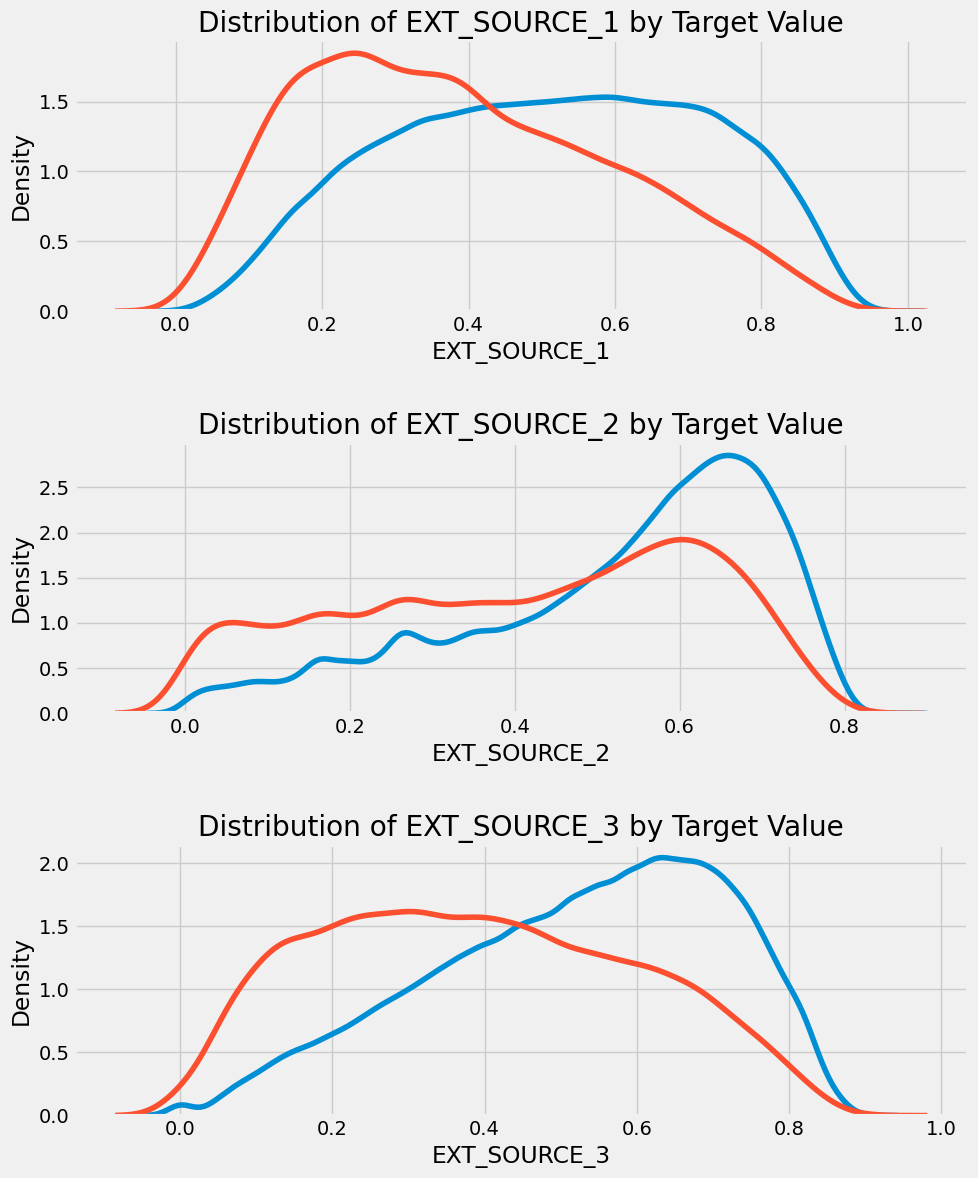

In [91]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

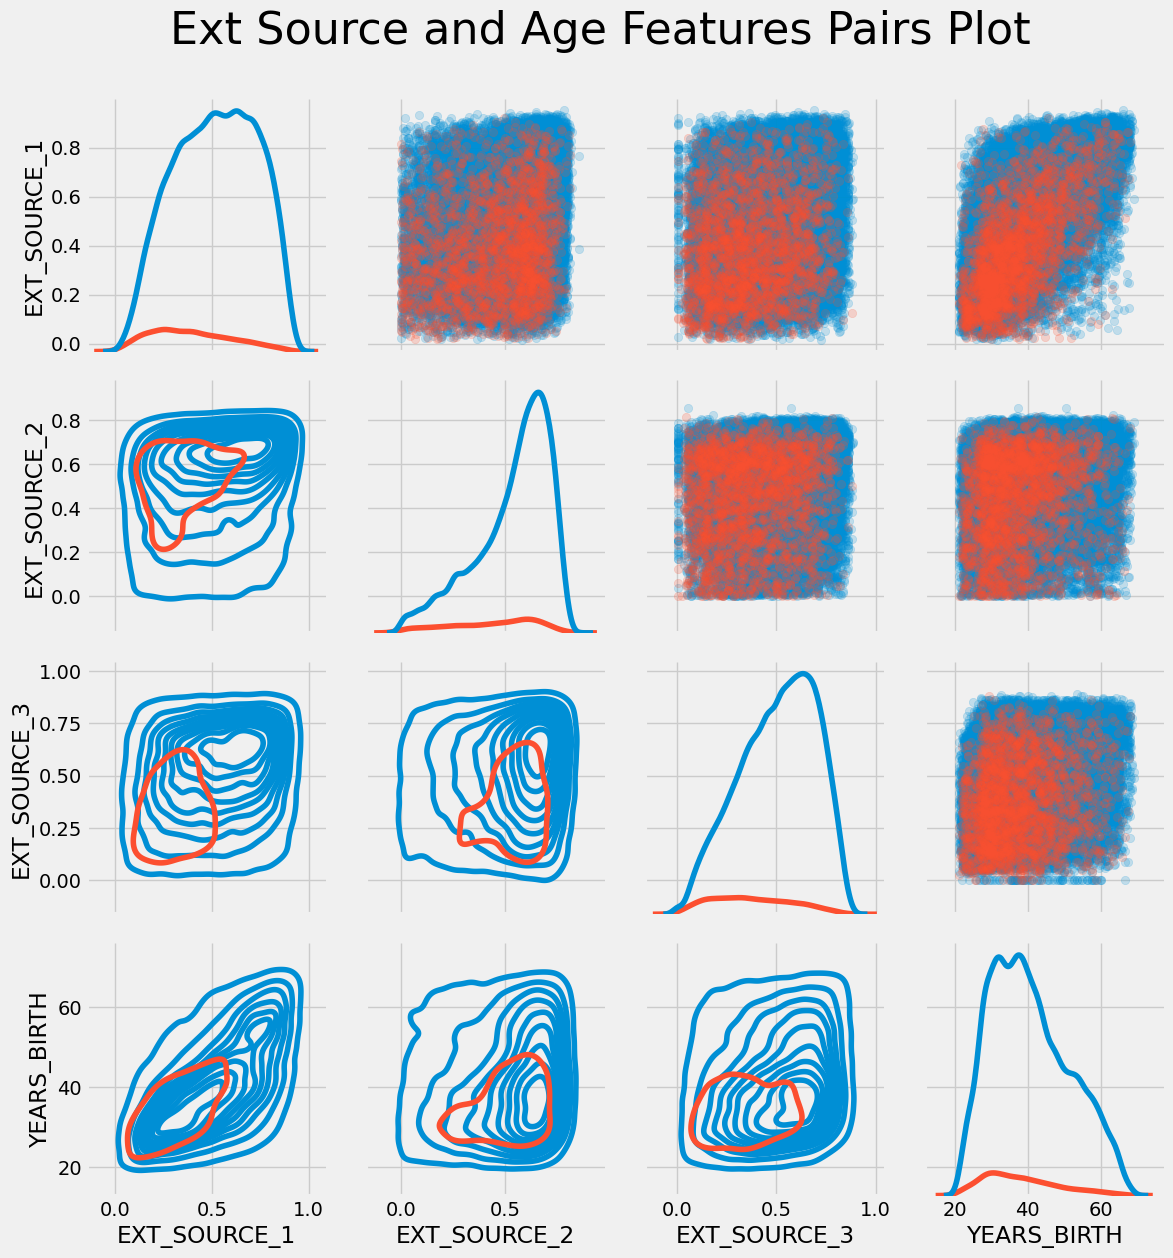

In [92]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data=plot_data, height=3, diag_sharey=False,
                    hue='TARGET', 
                    vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# Feature engineering 

In [93]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [94]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [95]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [96]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [97]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 511)
Testing data with polynomial features shape:   (48744, 511)


In [98]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [99]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

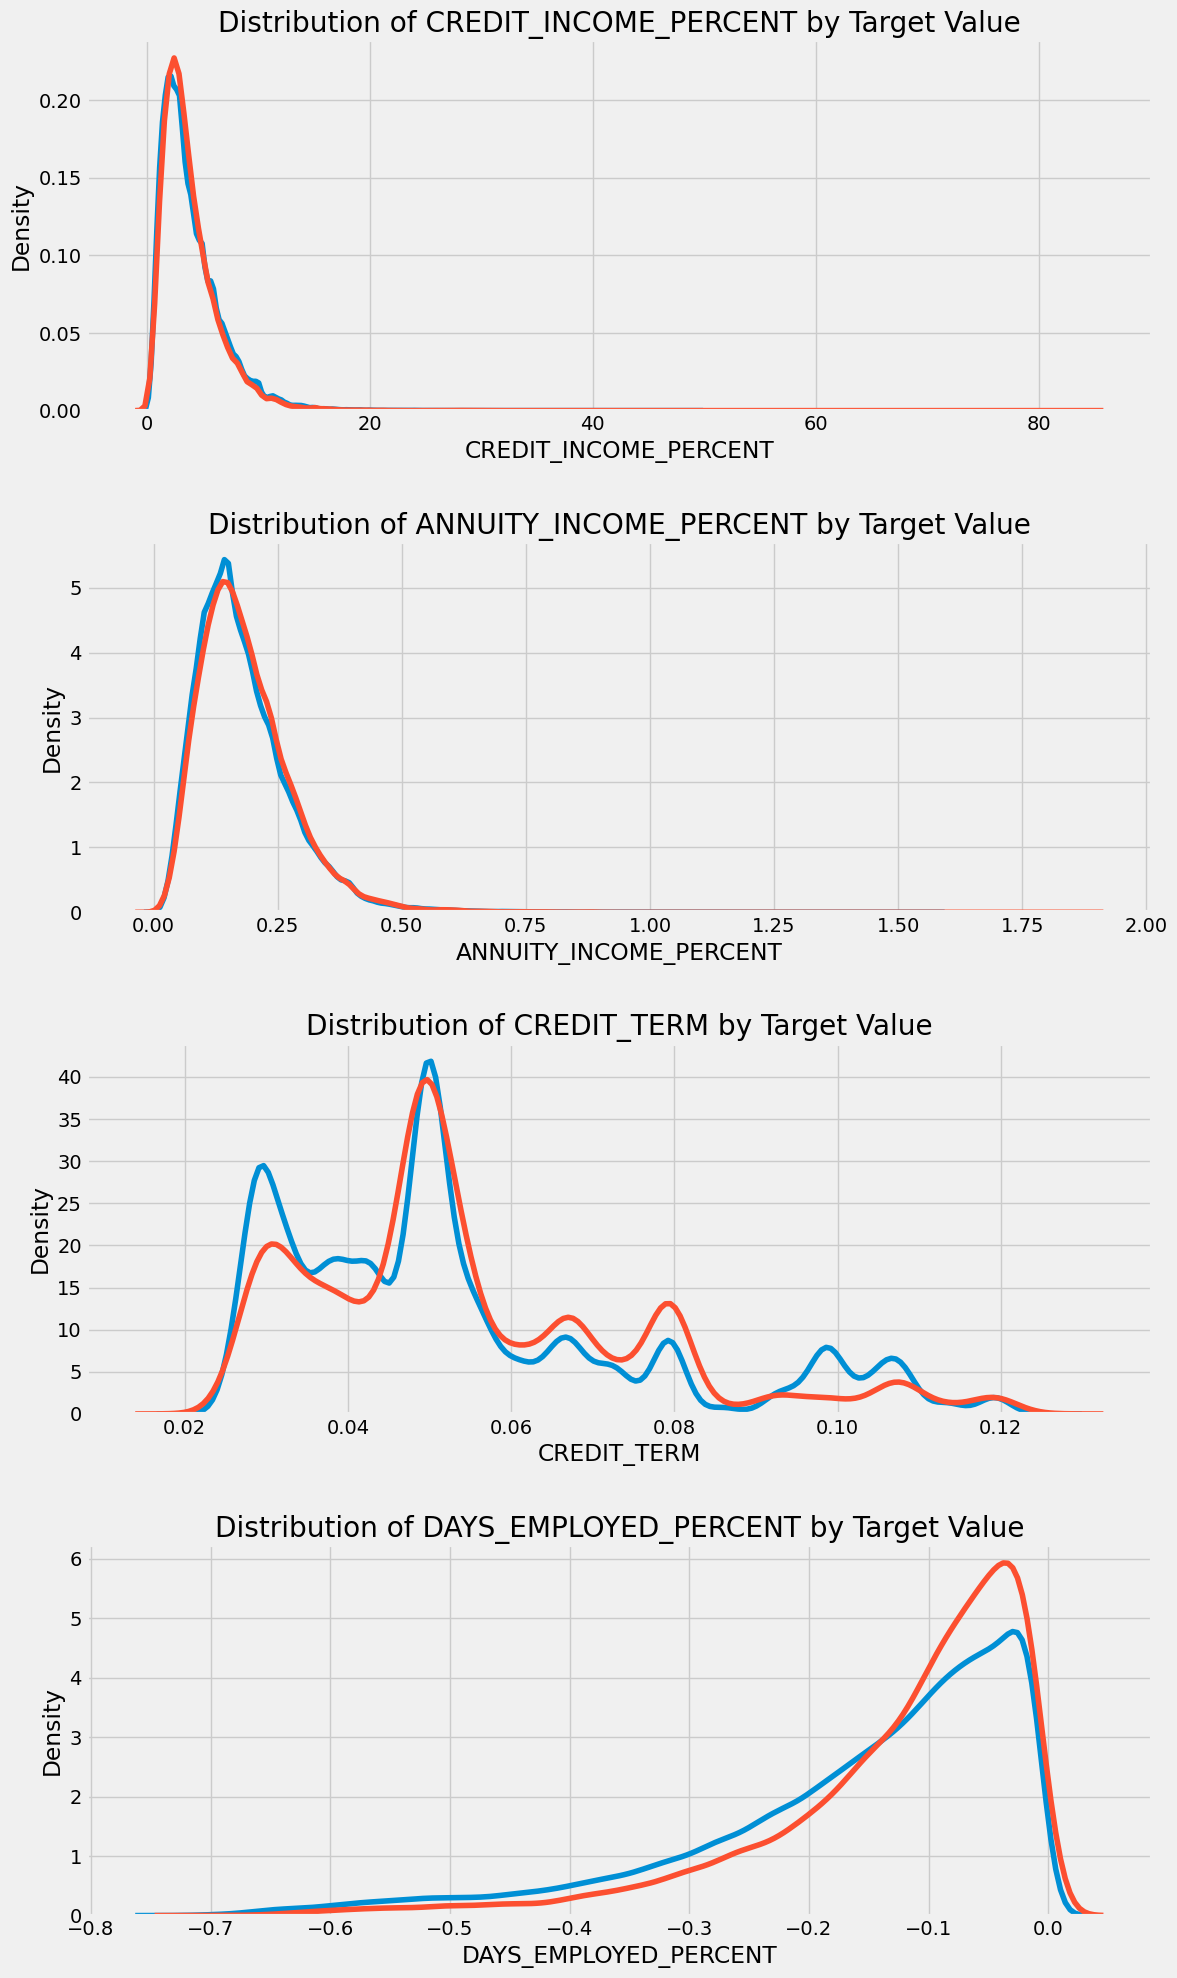

In [100]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Séparation finale des donnees

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Séparer la cible
target = app_train['TARGET']

# 2. Supprimer temporairement la cible
train = app_train.drop(columns=['TARGET'])
test = app_test.copy()

# 3. Concaténer train et test pour un encodage uniforme
all_data = pd.concat([train, test], axis=0)

# 4. Encodage One-Hot sur toutes les colonnes catégorielles
all_data_encoded = pd.get_dummies(all_data)

# 5. Re-séparer les datasets encodés
train_encoded = all_data_encoded.iloc[:len(train), :].copy()
test_encoded = all_data_encoded.iloc[len(train):, :].copy()

# 6. Imputation médiane des valeurs manquantes
imputer = SimpleImputer(strategy='median')
imputer.fit(train_encoded)
train_imputed = imputer.transform(train_encoded)
test_imputed = imputer.transform(test_encoded)

# 7. Mise à l’échelle (MinMax)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_imputed)
train_scaled = scaler.transform(train_imputed)
test_scaled = scaler.transform(test_imputed)

# 8. Optionnel : transformation en DataFrame pour lisibilité
train_final = pd.DataFrame(train_scaled, columns=train_encoded.columns)
test_final = pd.DataFrame(test_scaled, columns=test_encoded.columns)

# 9. Réintégration de la cible
train_final['TARGET'] = target.values

# 10. Affichage des shapes
print("Train shape :", train_final.shape)
print("Test shape  :", test_final.shape)


Train shape : (307511, 598)
Test shape  : (48744, 597)


In [102]:
# Concatène train et test pour un encodage uniforme
train['TARGET'] = app_train['TARGET']  # on remet la target pour ne pas la perdre
all_data = pd.concat([train, test], axis=0)

# One-Hot Encoding
all_data_encoded = pd.get_dummies(all_data)

# Séparer à nouveau
train_encoded = all_data_encoded.iloc[:len(train), :]
test_encoded = all_data_encoded.iloc[len(train):, :]

# Reprendre la cible
train_encoded['TARGET'] = app_train['TARGET']

In [103]:
train_final['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [109]:
test_final

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-0.000003,0.0,0.0,1.0,0.000000,0.000935,0.130787,0.073886,0.102132,0.257000,-1.506764,0.869975,0.790451,0.887175,0.098901,1.0,1.0,0.0,1.0,0.0,1.0,0.052632,0.5,0.5,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.778428,0.923573,0.177549,0.0660,0.0590,0.9732,0.7552,0.0211,0.00,0.1379,0.1250,0.2083,0.0481,0.0756,0.0505,0.0000,0.0036,0.0672,0.0612,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000008,0.0,0.0,1.0,0.000000,0.000627,0.044387,0.061443,0.034792,0.491595,-1.440417,0.750502,0.630431,0.774489,0.098901,1.0,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.580538,0.341118,0.482907,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000031,0.0,1.0,1.0,0.000000,0.001512,0.154373,0.265830,0.147026,0.260475,-1.551691,0.751117,0.911843,0.513269,0.054945,1.0,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.518318,0.818464,0.681715,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000073,0.0,0.0,

In [110]:
# Changer le répertoire courant
os.chdir(r"C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 8 MLOPS2\datasets")

# Afficher les fichiers pour vérifier
print(os.listdir())

['app_test.csv', 'app_train.csv']


In [111]:
train_final.to_csv("train_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)

# TEST MODELE KAGGLE

In [130]:
# Sépare les features et la cible
train_features = train_final.drop(columns=['TARGET'])
train_labels = train_final['TARGET']

# Crée et entraîne le modèle
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train_features, train_labels)


LogisticRegression(C=0.0001)

In [ ]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Séparer les features et la cible
X = train_final.drop(columns=['TARGET'])
y = train_final['TARGET']

# Split en train/validation (80/20 par exemple)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entraîne le modèle
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(X_train, y_train)

# Prédictions sur la validation
y_pred_proba = log_reg.predict_proba(X_val)[:, 1]
y_pred_class = log_reg.predict(X_val)

# Calcul des métriques
accuracy = accuracy_score(y_val, y_pred_class)
roc_auc = roc_auc_score(y_val, y_pred_proba)
f1 = f1_score(y_val, y_pred_class)
precision = precision_score(y_val, y_pred_class)
recall = recall_score(y_val, y_pred_class)

# Affichage
print(f"Accuracy  : {accuracy:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")


Accuracy  : 0.9193
ROC AUC   : 0.7077
F1 Score  : 0.0000
Precision : 0.0000
Recall    : 0.0000


In [125]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.069712
1,100005,0.150476
2,100013,0.063237
3,100028,0.080839
4,100038,0.139076


In [99]:
submit.to_csv('log_reg_baseline.csv', index = False)

# TEST MODELES P6 EXPERIMENT et MLFLOW

In [71]:
import mlflow

In [120]:
mlflow.set_experiment("P6 experiment")

2025/07/21 12:57:30 INFO mlflow.tracking.fluent: Experiment with name 'P6 experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/yacin/Desktop/DATA%20SCIENCE%20OPENCLASSROOMS/Projet%206%20MLOPS/DATASETP6/mlruns/651183770245561209', creation_time=1753095450412, experiment_id='651183770245561209', last_update_time=1753095450412, lifecycle_stage='active', name='P6 experiment', tags={}>

In [121]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
import mlflow
import mlflow.sklearn

# 1. Séparer les features et la cible
X = train_final.drop(columns=['TARGET'])
y = train_final['TARGET']

# 2. Split train / validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# 4. Start run MLflow
with mlflow.start_run():
    # a. Paramètre
    C_value = 0.0001
    mlflow.log_param("C", C_value)

    # b. Entraînement du modèle
    model = LogisticRegression(C=C_value)
    model.fit(X_train, y_train)

    # c. Prédictions
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred_class = model.predict(X_val)

    # d. Métriques
    accuracy = accuracy_score(y_val, y_pred_class)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    f1 = f1_score(y_val, y_pred_class)
    precision = precision_score(y_val, y_pred_class)
    recall = recall_score(y_val, y_pred_class)

    # e. Log des métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

    # f. Log du modèle
    mlflow.sklearn.log_model(model, "model", registered_model_name="logistic_model")

    # g. Affichage console
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"ROC AUC   : {roc_auc:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")


2025/07/21 13:25:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 13:25:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'logistic_model'.
2025/07/21 13:25:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logistic_model, version 1


Accuracy  : 0.9193
ROC AUC   : 0.7077
F1 Score  : 0.0000
Precision : 0.0000
Recall    : 0.0000
🏃 View run selective-yak-429 at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/7c59d9913ec84a8d85e125a69d9524ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


Created version '1' of model 'logistic_model'.


In [72]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score
import mlflow
import mlflow.sklearn

# --- Séparation initiale (à faire une seule fois) ---
def prepare_data(X_full, y_full, test_size=0.2, random_state=42):
    return train_test_split(
        X_full, y_full,
        test_size=test_size,
        random_state=random_state
    )

# --- Pipeline d'évaluation réutilisable ---
def evaluate_model_with_cv_and_test(model, model_name, X_train, y_train, X_test, y_test, cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    if model_name == "LightGBM":
        X_train = clean_column_names(X_train)
        X_test = clean_column_names(X_test)

    # Standardisation uniquement pour MLP
    if model_name == "MLPClassifier":
        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
      
    aucs, f1s, recalls = [], [], []

    with mlflow.start_run(run_name=model_name):
        for train_idx, val_idx in cv.split(X_train, y_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_tr, y_tr)
            y_val_proba = model.predict_proba(X_val)[:, 1]
            y_val_pred = model.predict(X_val)

            aucs.append(roc_auc_score(y_val, y_val_proba))
            f1s.append(f1_score(y_val, y_val_pred))
            recalls.append(recall_score(y_val, y_val_pred))

        # Moyennes CV
        mean_auc = np.mean(aucs)
        mean_f1 = np.mean(f1s)
        mean_recall = np.mean(recalls)

        # Entraînement sur tout le train
        model.fit(X_train, y_train)

        # Évaluation finale sur test
        y_test_proba = model.predict_proba(X_test)[:, 1]
        y_test_pred = model.predict(X_test)

        test_auc = roc_auc_score(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Log MLflow
        mlflow.log_param("model", model_name)
        mlflow.log_metric("cv_mean_auc", mean_auc)
        mlflow.log_metric("cv_mean_f1", mean_f1)
        mlflow.log_metric("cv_mean_recall", mean_recall)

        mlflow.log_metric("test_auc", test_auc)
        mlflow.log_metric("test_f1", test_f1)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_accuracy", test_accuracy)

        # Log du modèle final
        mlflow.sklearn.log_model(
    sk_model=model,
    artifact_path="model",
    registered_model_name=model_name  # nom que tu veux retrouver dans l'onglet Models
)


        # Affichage
        print(f"\n📌 Résultats pour {model_name}")
        print(f"  [CV]    AUC: {mean_auc:.4f} | F1: {mean_f1:.4f} | Recall: {mean_recall:.4f}")
        print(f"  [Test]  AUC: {test_auc:.4f} | F1: {test_f1:.4f} | Recall: {test_recall:.4f} | Acc: {test_accuracy:.4f}")

In [73]:
def clean_column_names(df):
    df = df.copy()
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df

In [74]:
X = train_final.drop(columns=['TARGET'])
y = train_final['TARGET']
X_train, X_test, y_train, y_test = prepare_data(X, y)

In [146]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000)
evaluate_model_with_cv_and_test(log_model, "LogisticRegression", X_train, y_train, X_test, y_test)

2025/07/21 14:54:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 14:54:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/07/21 14:54:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 2



📌 Résultats pour LogisticRegression
  [CV]    AUC: 0.7201 | F1: 0.2427 | Recall: 0.6648
  [Test]  AUC: 0.7296 | F1: 0.2441 | Recall: 0.6729 | Acc: 0.6647
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/b125919cbd4f4b6ca00b8a1ad8dadba7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


Created version '2' of model 'LogisticRegression'.


In [147]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=30, max_depth=6, class_weight="balanced", random_state=42, n_jobs=-1)
evaluate_model_with_cv_and_test(rf_model, "RandomForest", X_train, y_train, X_test, y_test)


2025/07/21 14:54:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 14:54:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForest' already exists. Creating a new version of this model...
2025/07/21 14:54:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest, version 2



📌 Résultats pour RandomForest
  [CV]    AUC: 0.7239 | F1: 0.2498 | Recall: 0.6363
  [Test]  AUC: 0.7257 | F1: 0.2479 | Recall: 0.6199 | Acc: 0.6973
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/fd224370d60d471b97ce08b9daa3d928
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


Created version '2' of model 'RandomForest'.


In [149]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(),  # gestion du déséquilibre
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

evaluate_model_with_cv_and_test(xgb_model, "XGBoost", X_train, y_train, X_test, y_test)


2025/07/21 15:13:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 15:13:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost'.
2025/07/21 15:13:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1



📌 Résultats pour XGBoost
  [CV]    AUC: 0.7727 | F1: 0.2917 | Recall: 0.6550
  [Test]  AUC: 0.7744 | F1: 0.2895 | Recall: 0.6636 | Acc: 0.7379
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/c28facbfd7774c448fb46fe6ca7f1417
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


Created version '1' of model 'XGBoost'.


In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    class_weight="balanced",  # gestion automatique du déséquilibre
    random_state=42,
    n_jobs=-1
)

evaluate_model_with_cv_and_test(lgbm_model, "LightGBM", X_train, y_train, X_test, y_test)

In [154]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    class_weight="balanced",  # gestion automatique du déséquilibre
    random_state=42,
    n_jobs=-1
)

evaluate_model_with_cv_and_test(lgbm_model, "LightGBM", X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 15901, number of negative: 180905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.564033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77118
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 580
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15901, number of negative: 180905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.428546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77214
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 580
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGB

2025/07/21 15:21:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 15:21:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'LightGBM'.
2025/07/21 15:21:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM, version 1
Created version '1' of model 'LightGBM'.



📌 Résultats pour LightGBM
  [CV]    AUC: 0.7756 | F1: 0.2889 | Recall: 0.6811
  [Test]  AUC: 0.7757 | F1: 0.2863 | Recall: 0.6868 | Acc: 0.7245
🏃 View run LightGBM at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/8d9f0a1c48ce4f64ad997872b5b5be06
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


In [156]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    solver='adam',
    random_state=42
)

evaluate_model_with_cv_and_test(mlp_model, "MLPClassifier", X_train, y_train, X_test, y_test)

2025/07/21 15:57:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 15:57:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLPClassifier' already exists. Creating a new version of this model...
2025/07/21 15:57:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLPClassifier, version 2



📌 Résultats pour MLPClassifier
  [CV]    AUC: 0.7426 | F1: 0.0649 | Recall: 0.0400
  [Test]  AUC: 0.7326 | F1: 0.1313 | Recall: 0.0792 | Acc: 0.9157
🏃 View run MLPClassifier at: http://127.0.0.1:5000/#/experiments/651183770245561209/runs/ddb9d889ccb8402bac2265f856e88ac1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/651183770245561209


Created version '2' of model 'MLPClassifier'.


# TEST MODELES 2EME EXPERIMENT

In [55]:
mlflow.set_experiment("P6 experiment NUM 2")

2025/07/22 10:37:55 INFO mlflow.tracking.fluent: Experiment with name 'P6 experiment NUM 2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/yacin/Desktop/DATA%20SCIENCE%20OPENCLASSROOMS/Projet%206%20MLOPS/DATASETP6/mlruns/201182239510782124', creation_time=1753173475981, experiment_id='201182239510782124', last_update_time=1753173475981, lifecycle_stage='active', name='P6 experiment NUM 2', tags={}>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import optuna
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix


# ----------- Fonction de coût métier -----------
def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn * fn_cost + fp * fp_cost

# ----------- Recherche du meilleur seuil -----------
def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
    best_threshold = 0.5
    lowest_cost = float("inf")
    cost_per_threshold = []

    for threshold in thresholds:
        y_pred = (y_probas >= threshold).astype(int)
        cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
        cost_per_threshold.append((threshold, cost))
        if cost < lowest_cost:
            best_threshold = threshold
            lowest_cost = cost

    return best_threshold, lowest_cost, cost_per_threshold

# ----------- Tracé de la courbe coût vs seuil -----------
def plot_cost_vs_threshold(costs):
    thresholds, costs = zip(*costs)
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, costs, marker='o')
    plt.xlabel('Seuil de classification')
    plt.ylabel('Coût métier')
    plt.title('Courbe Coût métier vs Seuil')
    plt.grid(True)
    plt.show()

# ----------- Pipeline rapide et optimisé -----------
def evaluate_model_with_cv_and_optuna(
    model_class,
    model_name,
    X_train,
    y_train,
    X_test,
    y_test,
    param_space,
    cv_splits=5,
    fn_cost=10,
    fp_cost=1
):
    def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        return fn * fn_cost + fp * fp_cost

    def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
        best_threshold = 0.5
        lowest_cost = float("inf")
        cost_per_threshold = []

        for threshold in thresholds:
            y_pred = (y_probas >= threshold).astype(int)
            cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
            cost_per_threshold.append((threshold, cost))
            if cost < lowest_cost:
                best_threshold = threshold
                lowest_cost = cost

        return best_threshold, lowest_cost, cost_per_threshold

    def plot_cost_vs_threshold(costs):
        thresholds, costs = zip(*costs)
        plt.figure(figsize=(8, 4))
        plt.plot(thresholds, costs, marker='o')
        plt.xlabel('Seuil de classification')
        plt.ylabel('Coût métier')
        plt.title('Courbe Coût métier vs Seuil')
        plt.grid(True)
        plt.show()

    def objective(trial):
        params = {}
        for key, space in param_space.items():
            if isinstance(space, tuple):
                if space[0] == "int":
                    params[key] = trial.suggest_int(key, space[1], space[2])
                elif space[0] == "float":
                    params[key] = trial.suggest_float(key, space[1], space[2])
                else:
                    raise ValueError(f"Unknown type in param_space for key '{key}': {space[0]}")
            else:
                params[key] = trial.suggest_categorical(key, space)

        model = model_class(**params)
        y_val_proba = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42),
            method='predict_proba',
            n_jobs=-1
        )[:, 1]
        y_val_pred = (y_val_proba >= 0.5).astype(int)
        return compute_business_cost(y_train, y_val_pred, fn_cost, fp_cost)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30)
    best_params = study.best_params

    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)

    y_proba = best_model.predict_proba(X_test)[:, 1]
    best_threshold, cost, cost_curve = find_best_threshold(y_test, y_proba, fn_cost=fn_cost, fp_cost=fp_cost)
    y_pred = (y_proba >= best_threshold).astype(int)

    with mlflow.start_run(nested=True):
        mlflow.log_param("model_name", model_name)
        for k, v in best_params.items():
            mlflow.log_param(k, v)

        mlflow.log_metric("best_threshold", best_threshold)
        mlflow.log_metric("business_cost", cost)
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision", precision_score(y_test, y_pred))
        mlflow.log_metric("recall", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

        mlflow.sklearn.log_model(best_model, "model", registered_model_name=model_name)

    plot_cost_vs_threshold(cost_curve)


Pourquoi un seuil à 0.1 : Par défaut, le seuil est 0.5.
Mais dans ton projet, accorder un crédit à un mauvais client (FN) est très coûteux.

Donc, en abaissant le seuil à 0.1, tu dis :

    "Même si j’ai seulement 10% de certitude qu’un client est mauvais, je préfère le classer comme tel pour éviter une perte potentielle."

In [80]:
from sklearn.model_selection import train_test_split

X = train_final.drop(columns=["TARGET"])
y = train_final["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
#LOGREG

In [73]:
param_space_logreg = {
    "C": (1e-5, 10),
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "class_weight": ["balanced"]
}

[I 2025-07-22 11:44:20,932] A new study created in memory with name: no-name-e578d302-0270-43fb-a0e8-c8f9b68a2d80
[I 2025-07-22 11:44:42,783] Trial 0 finished with value: 195128.0 and parameters: {'C': 0.7888105615207518}. Best is trial 0 with value: 195128.0.
[I 2025-07-22 11:45:03,788] Trial 1 finished with value: 194973.0 and parameters: {'C': 0.6324238791237177}. Best is trial 1 with value: 194973.0.
[I 2025-07-22 11:45:24,652] Trial 2 finished with value: 195386.0 and parameters: {'C': 0.1236099271057344}. Best is trial 1 with value: 194973.0.
[I 2025-07-22 11:45:45,099] Trial 3 finished with value: 196219.0 and parameters: {'C': 0.037441358163194986}. Best is trial 1 with value: 194973.0.
[I 2025-07-22 11:46:06,162] Trial 4 finished with value: 195052.0 and parameters: {'C': 0.5194764979810726}. Best is trial 1 with value: 194973.0.
[I 2025-07-22 11:46:27,194] Trial 5 finished with value: 195795.0 and parameters: {'C': 0.05641963789204128}. Best is trial 1 with value: 194973.0.
[

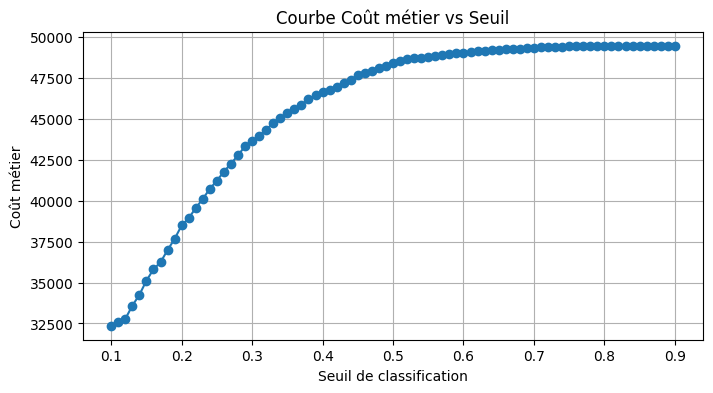

In [75]:

from sklearn.linear_model import LogisticRegression

param_space_logreg = {
    "C": (1e-5, 1.0)
}

evaluate_model_with_cv_and_optuna(
    model_class=LogisticRegression,
    model_name="LogisticRegression",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_logreg
)


In [77]:
#Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

param_space_rf = {
    "n_estimators": ("int", 10, 30),          # ↓ réduit le nombre d’arbres
    "max_depth": ("int", 2, 6),               # ↓ arbres plus simples
    "min_samples_split": ("int", 2, 5),
    "class_weight": ["balanced"]
}

[I 2025-07-22 12:14:56,355] A new study created in memory with name: no-name-46c43b0c-d4d0-4b9c-9bac-9929c561cb9f
[I 2025-07-22 12:15:23,278] Trial 0 finished with value: 146486.0 and parameters: {'n_estimators': 28, 'max_depth': 4, 'min_samples_split': 3, 'class_weight': 'balanced'}. Best is trial 0 with value: 146486.0.
[I 2025-07-22 12:16:05,600] Trial 1 finished with value: 141442.0 and parameters: {'n_estimators': 30, 'max_depth': 6, 'min_samples_split': 4, 'class_weight': 'balanced'}. Best is trial 1 with value: 141442.0.
[I 2025-07-22 12:16:35,532] Trial 2 finished with value: 141820.0 and parameters: {'n_estimators': 21, 'max_depth': 6, 'min_samples_split': 2, 'class_weight': 'balanced'}. Best is trial 1 with value: 141442.0.
[I 2025-07-22 12:16:54,648] Trial 3 finished with value: 149911.0 and parameters: {'n_estimators': 26, 'max_depth': 3, 'min_samples_split': 5, 'class_weight': 'balanced'}. Best is trial 1 with value: 141442.0.
[I 2025-07-22 12:17:29,274] Trial 4 finished w

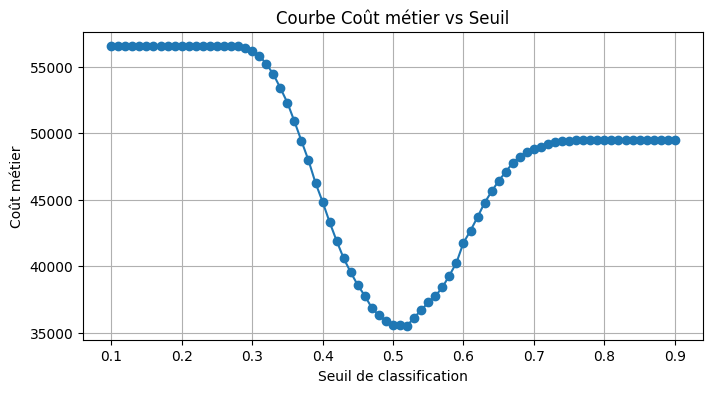

In [88]:
evaluate_model_with_cv_and_optuna(
    model_class=RandomForestClassifier,
    model_name="RandomForest",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_rf,
    n_trials=5,              # ↓ moins d’essais
    cv_splits=3              # ↓ moins de folds
)

In [89]:
#XGBOOST

In [98]:
from xgboost import XGBClassifier
param_space_xgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 6),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "gamma": ("float", 0.0, 5.0),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}



[I 2025-07-22 12:30:34,636] A new study created in memory with name: no-name-8bba0d40-0baa-478b-bf2b-903e3a70476f
[I 2025-07-22 12:30:55,523] Trial 0 finished with value: 188555.0 and parameters: {'n_estimators': 129, 'max_depth': 5, 'learning_rate': 0.2712582907788911, 'subsample': 0.6592305555889861, 'colsample_bytree': 0.8884773289752749, 'gamma': 0.9904412828734699, 'reg_lambda': 7.120059878336533, 'reg_alpha': 8.398715064964064}. Best is trial 0 with value: 188555.0.
[I 2025-07-22 12:31:11,232] Trial 1 finished with value: 191839.0 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.1821466239906083, 'subsample': 0.6026807758531344, 'colsample_bytree': 0.6948536964894557, 'gamma': 4.6160786825101665, 'reg_lambda': 5.162827464503258, 'reg_alpha': 8.260878658744675}. Best is trial 0 with value: 188555.0.
[I 2025-07-22 12:31:27,121] Trial 2 finished with value: 190957.0 and parameters: {'n_estimators': 69, 'max_depth': 6, 'learning_rate': 0.20078445281000126, 'su

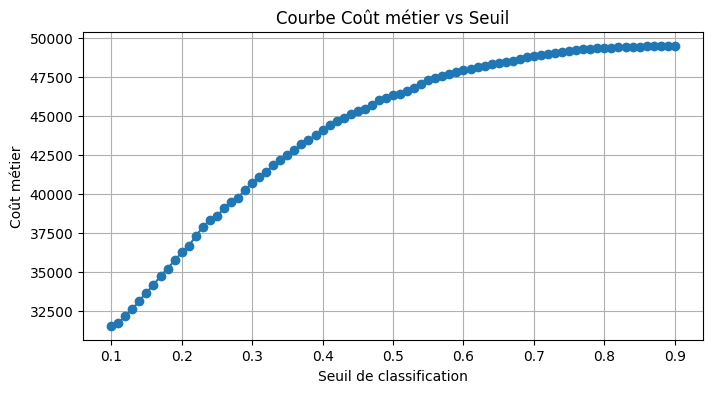

In [99]:
evaluate_model_with_cv_and_optuna(
    model_class= XGBClassifier,
    model_name="XGBoost",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_xgb,
    cv_splits=3  # Validation croisée rapide
)

In [100]:
#LightGBM

[I 2025-07-22 12:48:47,053] A new study created in memory with name: no-name-fa469592-cae9-49de-bf65-6cf3352d9780
[I 2025-07-22 12:49:00,366] Trial 0 finished with value: 197402.0 and parameters: {'n_estimators': 54, 'max_depth': 4, 'learning_rate': 0.11582107253018833, 'subsample': 0.6289235105301025, 'colsample_bytree': 0.7195531381602743, 'num_leaves': 21, 'reg_lambda': 6.3955208702418895, 'reg_alpha': 5.208615574130884}. Best is trial 0 with value: 197402.0.
[I 2025-07-22 12:49:14,191] Trial 1 finished with value: 198760.0 and parameters: {'n_estimators': 119, 'max_depth': 3, 'learning_rate': 0.01533327771818761, 'subsample': 0.7694922610590511, 'colsample_bytree': 0.806944391968403, 'num_leaves': 39, 'reg_lambda': 8.825408427764264, 'reg_alpha': 6.4940264917118835}. Best is trial 0 with value: 197402.0.
[I 2025-07-22 12:49:25,855] Trial 2 finished with value: 195840.0 and parameters: {'n_estimators': 53, 'max_depth': 4, 'learning_rate': 0.16569435070039887, 'subsample': 0.83899404

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.672033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77162
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 582
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606


2025/07/22 12:57:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 12:57:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LightGBM' already exists. Creating a new version of this model...
Created version '2' of model 'LightGBM'.


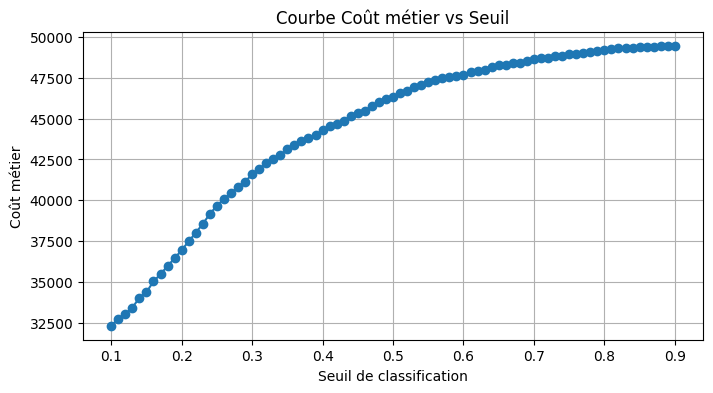

In [104]:
from lightgbm import LGBMClassifier

# 1. Nettoyage des colonnes (obligatoire pour LightGBM)
def clean_column_names(df):
    df.columns = (
        df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    )
    return df

# Appliquer le nettoyage
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# 2. Définir l’espace de recherche pour Optuna
param_space_lgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 10),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "num_leaves": ("int", 20, 50),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}

# 3. Appeler le pipeline
evaluate_model_with_cv_and_optuna(
    model_class=LGBMClassifier,
    model_name="LightGBM",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_lgb,
    cv_splits=3
)


# Test des fonctions d'activation MLP

In [84]:
mlflow.set_experiment("P4 MLP fonction activation")

2025/08/04 12:13:05 INFO mlflow.tracking.fluent: Experiment with name 'P4 MLP fonction activation' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/yacin/Desktop/DATA%20SCIENCE%20OPENCLASSROOMS/Projet%206%20MLOPS/DATASETP6/mlruns/512068966358161009', creation_time=1754302385116, experiment_id='512068966358161009', last_update_time=1754302385116, lifecycle_stage='active', name='P4 MLP fonction activation', tags={}>

In [87]:
#fonction activation : logistic

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_space_mlp3 = {
    "hidden_layer_sizes": [  # liste car c'est catégoriel
        (50,), (100,), (50, 50), (100, 50)
    ],
    "activation": ["logistic"],
    "alpha": ("float", 1e-5, 1e-2),  # régularisation L2
    "learning_rate_init": ("float", 0.0001, 0.01),
    "solver": ["adam", "sgd"]
}

[I 2025-08-04 12:37:30,093] A new study created in memory with name: no-name-843a22c2-4cd4-4673-b704-7373d69253cf
[I 2025-08-04 12:37:51,155] Trial 0 finished with value: 196816.0 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'alpha': 0.006539046959904673, 'learning_rate_init': 0.00991966694682993, 'solver': 'sgd'}. Best is trial 0 with value: 196816.0.
[I 2025-08-04 12:38:13,802] Trial 1 finished with value: 198760.0 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'alpha': 0.0019221078000165126, 'learning_rate_init': 0.0005560125691735497, 'solver': 'sgd'}. Best is trial 0 with value: 196816.0.
[I 2025-08-04 12:38:35,863] Trial 2 finished with value: 197863.0 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'alpha': 0.0012533062624463587, 'learning_rate_init': 0.008743980142633908, 'solver': 'adam'}. Best is trial 0 with value: 196816.0.
[I 2025-08-04 12:39:24,637] Trial 3 finished with value: 195748.0 and par

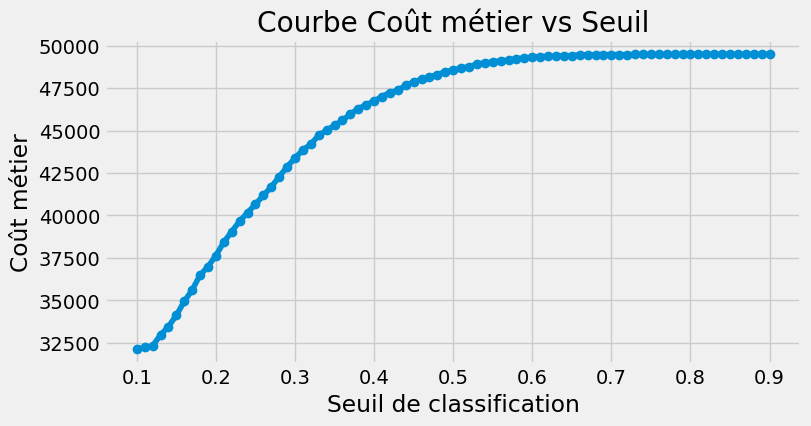

In [91]:
evaluate_model_with_cv_and_optuna(
    model_class=build_mlp_model_with_scaler,
    model_name="MLPClassifier",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_mlp3,
    cv_splits=3
)

In [83]:
#fonction activation : identity

In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_space_mlp2 = {
    "hidden_layer_sizes": [  # liste car c'est catégoriel
        (50,), (100,), (50, 50), (100, 50)
    ],
    "activation": ["identity"],
    "alpha": ("float", 1e-5, 1e-2),  # régularisation L2
    "learning_rate_init": ("float", 0.0001, 0.01),
    "solver": ["adam", "sgd"]
}

[I 2025-08-04 12:13:49,803] A new study created in memory with name: no-name-6ab07f06-b6b6-4017-b004-db31ff8ebb33
[I 2025-08-04 12:14:27,020] Trial 0 finished with value: 194516.0 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'identity', 'alpha': 0.009804154540589777, 'learning_rate_init': 0.008482800174240591, 'solver': 'sgd'}. Best is trial 0 with value: 194516.0.
[I 2025-08-04 12:14:51,756] Trial 1 finished with value: 197781.0 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'identity', 'alpha': 0.0036165290598013673, 'learning_rate_init': 0.0062473195942359845, 'solver': 'adam'}. Best is trial 0 with value: 194516.0.
[I 2025-08-04 12:15:13,724] Trial 2 finished with value: 196205.0 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'identity', 'alpha': 0.00577417406493236, 'learning_rate_init': 0.004802468949129519, 'solver': 'adam'}. Best is trial 0 with value: 194516.0.
[I 2025-08-04 12:15:42,281] Trial 3 finished with value: 194412.0 and

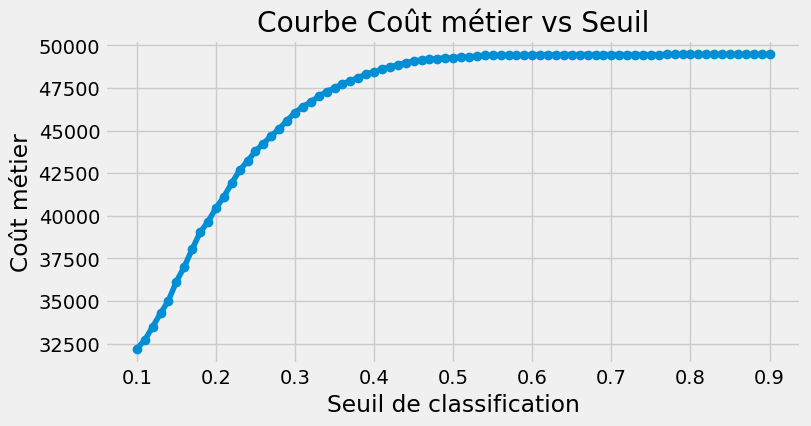

In [86]:
evaluate_model_with_cv_and_optuna(
    model_class=build_mlp_model_with_scaler,
    model_name="MLPClassifier",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_mlp2,
    cv_splits=3
)

In [77]:
#fonction activation : relu

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_space_mlp = {
    "hidden_layer_sizes": [  # liste car c'est catégoriel
        (50,), (100,), (50, 50), (100, 50)
    ],
    "activation": ["relu"],
    "alpha": ("float", 1e-5, 1e-2),  # régularisation L2
    "learning_rate_init": ("float", 0.0001, 0.01),
    "solver": ["adam", "sgd"]
}

In [78]:
from sklearn.pipeline import Pipeline

def build_mlp_model_with_scaler(**params):
    return Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(random_state=42, max_iter=100, early_stopping=True, **params))
    ])

[I 2025-07-22 16:34:42,724] A new study created in memory with name: no-name-ba3b0f57-9c55-4d9b-a158-b560a5ce2176
[I 2025-07-22 16:35:14,755] Trial 0 finished with value: 195804.0 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.0015141658089803378, 'learning_rate_init': 0.008664513144211681, 'solver': 'adam'}. Best is trial 0 with value: 195804.0.
[I 2025-07-22 16:35:39,829] Trial 1 finished with value: 195709.0 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.004844586716099205, 'learning_rate_init': 0.004700393604799837, 'solver': 'adam'}. Best is trial 1 with value: 195709.0.
[I 2025-07-22 16:36:04,388] Trial 2 finished with value: 196785.0 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.009581060378547727, 'learning_rate_init': 0.006598780049003768, 'solver': 'adam'}. Best is trial 1 with value: 195709.0.
[I 2025-07-22 16:36:33,815] Trial 3 finished with value: 196361.0 and parameters:

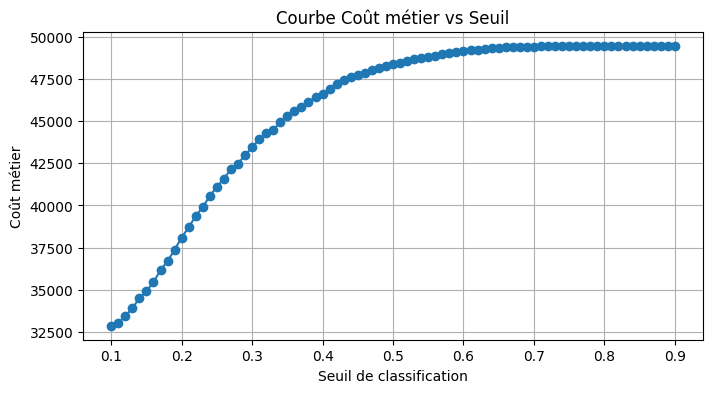

In [120]:
evaluate_model_with_cv_and_optuna(
    model_class=build_mlp_model_with_scaler,
    model_name="MLPClassifier",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_mlp,
    cv_splits=3
)


Nous avons choisi la fonction d’activation ReLU pour notre MLP car elle est largement reconnue pour améliorer la vitesse et la stabilité de l’apprentissage. Contrairement à des fonctions comme sigmoid ou tanh,
ReLU est moins sujette au problème du vanishing gradient, 
ce qui permet une meilleure convergence,
notamment dans le contexte de données tabulaires comme notre cas de scoring de crédit.

Les différentes fonctions d’activation testées pour le modèle MLP donnent des résultats globalement proches, avec quelques nuances importantes. La fonction identity présente la meilleure accuracy (0.761) et le meilleur F1-score (0.290), traduisant un bon équilibre entre rappel et précision. La fonction logistic obtient quant à elle la meilleure AUC-ROC (0.766), tandis que la fonction relu, bien qu’ayant une précision légèrement inférieure, affiche le meilleur recall (0.634), ce qui indique une meilleure capacité à détecter les mauvais payeurs, ainsi que le coût métier le plus faible (32138), ce qui est l’objectif prioritaire dans ce projet.

Dans le cadre de ce projet de scoring crédit, où le coût d’une erreur de type faux négatif (mauvais payeur classé comme bon) est 10 fois plus élevé que celui d’un faux positif, il est crucial de maximiser le rappel tout en minimisant le coût métier. La fonction d’activation relu permet justement d’obtenir ces deux résultats : une meilleure détection des mauvais payeurs et le coût global le plus bas.

# Test avec feature importance

In [76]:
import mlflow
mlflow.set_experiment("P6 exp 3 : feature importance")

2025/07/23 11:21:59 INFO mlflow.tracking.fluent: Experiment with name 'P6 exp 3 : feature importance' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/yacin/Desktop/DATA%20SCIENCE%20OPENCLASSROOMS/Projet%206%20MLOPS/DATASETP6/mlruns/463236787182217176', creation_time=1753262519130, experiment_id='463236787182217176', last_update_time=1753262519130, lifecycle_stage='active', name='P6 exp 3 : feature importance', tags={}>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import optuna
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix


# ----------- Fonction de coût métier -----------
def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn * fn_cost + fp * fp_cost

# ----------- Recherche du meilleur seuil -----------
def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
    best_threshold = 0.5
    lowest_cost = float("inf")
    cost_per_threshold = []

    for threshold in thresholds:
        y_pred = (y_probas >= threshold).astype(int)
        cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
        cost_per_threshold.append((threshold, cost))
        if cost < lowest_cost:
            best_threshold = threshold
            lowest_cost = cost

    return best_threshold, lowest_cost, cost_per_threshold

# ----------- Tracé de la courbe coût vs seuil -----------
def plot_cost_vs_threshold(costs):
    thresholds, costs = zip(*costs)
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, costs, marker='o')
    plt.xlabel('Seuil de classification')
    plt.ylabel('Coût métier')
    plt.title('Courbe Coût métier vs Seuil')
    plt.grid(True)
    plt.show()

# ----------- Pipeline rapide et optimisé -----------
def evaluate_model_with_cv_and_optuna(
    model_class,
    model_name,
    X_train,
    y_train,
    X_test,
    y_test,
    param_space,
    cv_splits=5,
    fn_cost=10,
    fp_cost=1
):
    def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        return fn * fn_cost + fp * fp_cost

    def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
        best_threshold = 0.5
        lowest_cost = float("inf")
        cost_per_threshold = []

        for threshold in thresholds:
            y_pred = (y_probas >= threshold).astype(int)
            cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
            cost_per_threshold.append((threshold, cost))
            if cost < lowest_cost:
                best_threshold = threshold
                lowest_cost = cost

        return best_threshold, lowest_cost, cost_per_threshold

    def plot_cost_vs_threshold(costs):
        thresholds, costs = zip(*costs)
        plt.figure(figsize=(8, 4))
        plt.plot(thresholds, costs, marker='o')
        plt.xlabel('Seuil de classification')
        plt.ylabel('Coût métier')
        plt.title('Courbe Coût métier vs Seuil')
        plt.grid(True)
        plt.show()

    def objective(trial):
        params = {}
        for key, space in param_space.items():
            if isinstance(space, tuple):
                if space[0] == "int":
                    params[key] = trial.suggest_int(key, space[1], space[2])
                elif space[0] == "float":
                    params[key] = trial.suggest_float(key, space[1], space[2])
                else:
                    raise ValueError(f"Unknown type in param_space for key '{key}': {space[0]}")
            else:
                params[key] = trial.suggest_categorical(key, space)

        model = model_class(**params)
        y_val_proba = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42),
            method='predict_proba',
            n_jobs=-1
        )[:, 1]
        y_val_pred = (y_val_proba >= 0.5).astype(int)
        return compute_business_cost(y_train, y_val_pred, fn_cost, fp_cost)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30)
    best_params = study.best_params

    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)

    y_proba = best_model.predict_proba(X_test)[:, 1]
    best_threshold, cost, cost_curve = find_best_threshold(y_test, y_proba, fn_cost=fn_cost, fp_cost=fp_cost)
    y_pred = (y_proba >= best_threshold).astype(int)

    with mlflow.start_run(nested=True):
        mlflow.log_param("model_name", model_name)
        for k, v in best_params.items():
            mlflow.log_param(k, v)

        mlflow.log_metric("best_threshold", best_threshold)
        mlflow.log_metric("business_cost", cost)
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision", precision_score(y_test, y_pred))
        mlflow.log_metric("recall", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

        mlflow.sklearn.log_model(best_model, "model", registered_model_name=model_name)

    plot_cost_vs_threshold(cost_curve)
        

    # ----------- Importance globale des features (si disponible) -----------
    if hasattr(best_model, "feature_importances_"):
        importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
        importances_sorted = importances.sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        importances_sorted.head(20).plot(kind='barh')
        plt.title("Top 20 des variables les plus importantes (globale)")
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print("Ce modèle ne permet pas d'afficher les importances globales des variables directement.")

    # ----------- Importance locale avec SHAP pour un mauvais payeur -----------
    try:
        import shap

        idx_bad_payer = y_test[y_test == 1].index[0]
        instance = X_test.loc[[idx_bad_payer]]

        if model_name.lower() in ["randomforest", "xgboost", "lightgbm"]:
            explainer = shap.Explainer(best_model, X_train)
        else:
            explainer = shap.KernelExplainer(best_model.predict_proba, X_train.sample(100))

        shap_values = explainer(instance)

        print(f"Explication SHAP locale pour l'individu {idx_bad_payer} (mauvais payeur) :")
        shap.plots.waterfall(shap_values[0])

    except Exception as e:
        print("Impossible de calculer les SHAP values : ", e)



In [84]:
from xgboost import XGBClassifier
param_space_xgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 6),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "gamma": ("float", 0.0, 5.0),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}

[I 2025-07-23 11:58:14,966] A new study created in memory with name: no-name-19a62862-f5f1-4776-9d98-44b70656be7d
[I 2025-07-23 11:58:49,372] Trial 0 finished with value: 187950.0 and parameters: {'n_estimators': 143, 'max_depth': 5, 'learning_rate': 0.297186536263525, 'subsample': 0.9180476063666521, 'colsample_bytree': 0.882905214735087, 'gamma': 1.9702192423641929, 'reg_lambda': 5.122314117631787, 'reg_alpha': 6.923470544874413}. Best is trial 0 with value: 187950.0.
[I 2025-07-23 11:59:16,219] Trial 1 finished with value: 191579.0 and parameters: {'n_estimators': 137, 'max_depth': 3, 'learning_rate': 0.2527510247885972, 'subsample': 0.9827550063518464, 'colsample_bytree': 0.9808810888330901, 'gamma': 2.0097722689371627, 'reg_lambda': 0.6235051085184402, 'reg_alpha': 1.3869865833709905}. Best is trial 0 with value: 187950.0.
[I 2025-07-23 11:59:46,889] Trial 2 finished with value: 195123.0 and parameters: {'n_estimators': 102, 'max_depth': 5, 'learning_rate': 0.08355316619445181, 's

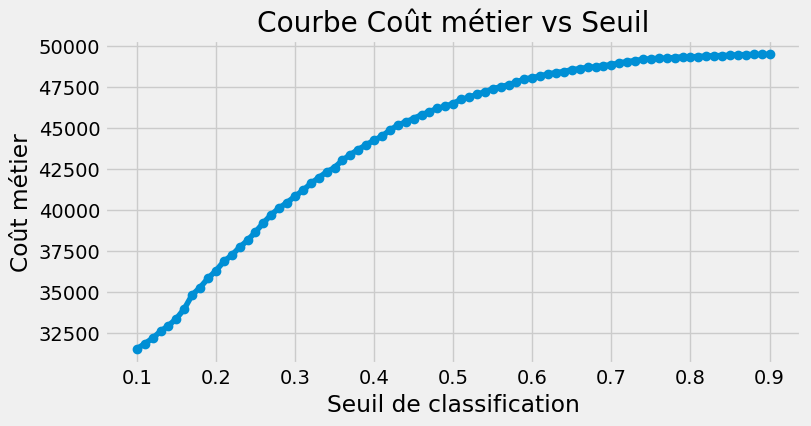

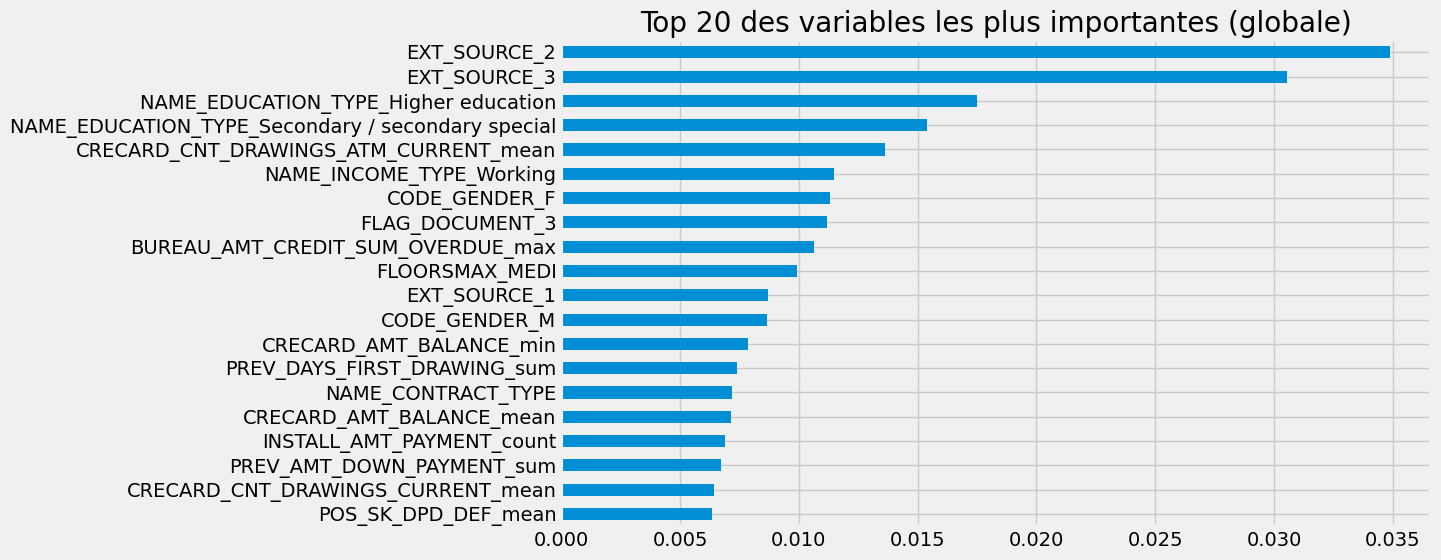

Explication SHAP locale pour l'individu 29765 (mauvais payeur) :


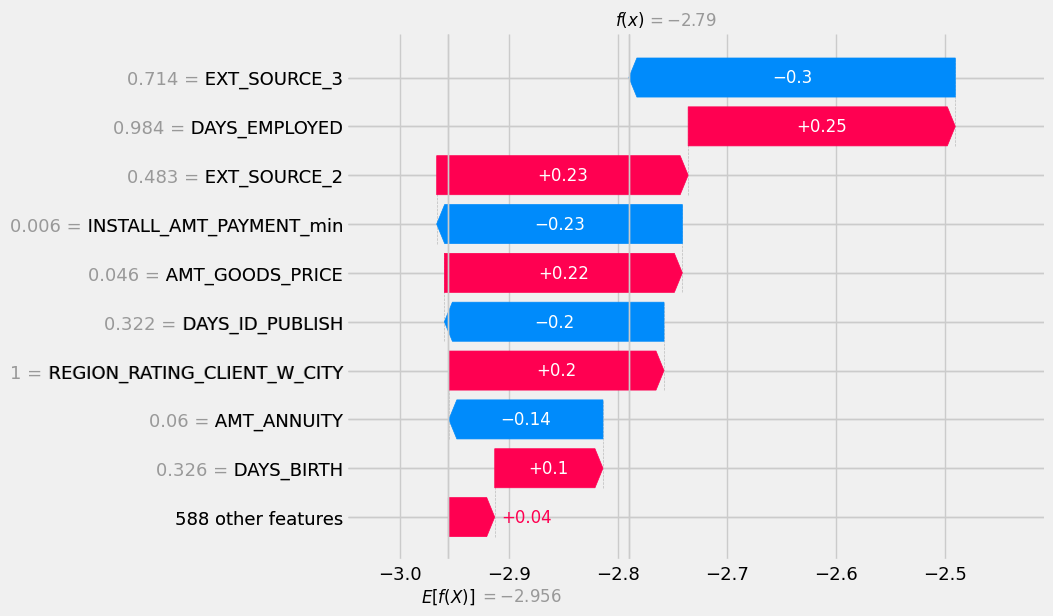

In [85]:
evaluate_model_with_cv_and_optuna(
    model_class= XGBClassifier,
    model_name="XGBoost",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_xgb,
    cv_splits=3  # Validation croisée rapide
)

Le modèle qui minimise le cout business est XGBOOST avec un cout s'elevant à 31523

Feature importance globale : 

    EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1
    Ce sont des scores externes (issus d'agences tierces) qui reflètent la probabilité de remboursement d’un client. Plus leur valeur est élevée, plus le client est considéré comme fiable. Ces variables sont très prédictives.

    NAME_EDUCATION_TYPE_Higher education
    Variable binaire : 1 si le client a un diplôme de l’enseignement supérieur, 0 sinon. L'éducation est souvent corrélée à une meilleure stabilité financière.

    NAME_EDUCATION_TYPE_Secondary / secondary special
    Pareil que ci-dessus, mais pour un niveau d'études secondaires.

    CRECARD_CNT_DRAWINGS_ATM_CURRENT_mean
    Nombre moyen de retraits d’argent liquide au distributeur à partir d’une carte de crédit. Des retraits fréquents peuvent signaler un besoin urgent de liquidités.

    NAME_INCOME_TYPE_Working
    1 si le client travaille (par opposition à retraité, étudiant, etc.). Cela peut influer sur la capacité de remboursement.

    CODE_GENDER_F / CODE_GENDER_M
    Variables binaires indiquant le sexe du client. Parfois incluses mais doivent être traitées avec prudence (biais).

    FLAG_DOCUMENT_3
    Indique si un document particulier (le n°3) a été fourni. Les documents fournis peuvent être liés à la qualité du dossier.

    BUREAU_AMT_CREDIT_SUM_OVERDUE_max
    Montant maximal en retard signalé dans les données des crédits antérieurs d'autres institutions. Indicateur direct de risque.

    FLOORSMAX_MEDI
    Hauteur de l’immeuble (en nombre d’étages) où vit le client, normalisée. Sert d’indicateur socio-économique.

    CRECARD_AMT_BALANCE_min / mean
    Montant minimum / moyen du solde restant sur la carte de crédit. Donne une idée de l’endettement.

    PREV_DAYS_FIRST_DRAWING_sum
    Somme des délais avant le premier tirage dans les crédits précédents. Peut montrer la rapidité d’utilisation des fonds.

    NAME_CONTRACT_TYPE
    Type de contrat de crédit (Cash loans ou revolving loans). Cela impacte les modalités de remboursement.

    INSTALL_AMT_PAYMENT_count
    Nombre total de paiements effectués dans les prêts précédents.

    PREV_AMT_DOWN_PAYMENT_sum
    Montant total des acomptes versés dans les crédits précédents.

    CRECARD_CNT_DRAWINGS_CURRENT_mean
    Nombre moyen d’opérations (achat, retrait) par carte de crédit.

    POS_SK_DPD_DEF_mean
    Nombre moyen de jours de retard avec défaut (délais supérieurs à la tolérance).

✅ À retenir

    EXT_SOURCE_1/2/3 sont les plus corrélés au remboursement : ce sont des agrégats externes très puissants.

    Les variables liées à l’éducation, l’emploi, les anciens crédits et le comportement sur cartes bancaires jouent un rôle fort.

    Certaines variables comme POS_SK_DPD_DEF_mean sont des signaux directs de défaut passés.

Feature importance locale : 

Le modèle penche vers une prédiction "mauvais payeur" car certaines variables comme INSTALL_AMT_PAYMENT_min ou EXT_SOURCE_3 font fortement baisser la prédiction.

Malgré des signaux rassurants (DAYS_EMPLOYED, EXT_SOURCE_2, etc.), cela n’a pas suffi à compenser les signaux de risque.

Cette vue SHAP permet donc de comprendre la prédiction individuelle, en mettant en évidence quelles caractéristiques ont été pénalisantes ou avantageuses pour cette personne.

EXT_SOURCE_3	0.714	-0.30 (🔵)	Ce score externe, malgré sa valeur plutôt élevée, a contribué à baisser la confiance du modèle. Il est possible que dans ton modèle, cette valeur ne soit pas si élevée par rapport à d'autres bons clients.

INSTALL_AMT_PAYMENT_min	0.006	-0.23 (🔵)	Le montant minimum remboursé sur les prêts précédents est très faible → le modèle y voit un signal de risque.

DAYS_ID_PUBLISH	0.322	-0.20 (🔵)	Temps depuis la publication de l'identité → peut refléter une certaine instabilité documentaire.

Le choix d’un seuil à 0.1 permet d’accepter un grand nombre de faux positifs (bons payeurs refusés) pour réduire les faux négatifs, car ceux-ci sont beaucoup plus coûteux.

Cela se traduit techniquement par un recall élevé (0.61) et un coût métier minimisé à 31 523, malgré une précision faible.

Ainsi, le modèle fait plus d’erreurs bénignes (FP) pour éviter les erreurs graves (FN), ce qui correspond parfaitement aux priorités business.

# Gestion de l'overfitting

In [93]:
mlflow.set_experiment("Overfitting commentary")

2025/08/04 13:22:54 INFO mlflow.tracking.fluent: Experiment with name 'Overfitting commentary' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/yacin/Desktop/DATA%20SCIENCE%20OPENCLASSROOMS/Projet%206%20MLOPS/DATASETP6/mlruns/209889904886885053', creation_time=1754306574345, experiment_id='209889904886885053', last_update_time=1754306574345, lifecycle_stage='active', name='Overfitting commentary', tags={}>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import optuna
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix


# ----------- Fonction de coût métier -----------
def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn * fn_cost + fp * fp_cost

# ----------- Recherche du meilleur seuil -----------
def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
    best_threshold = 0.5
    lowest_cost = float("inf")
    cost_per_threshold = []

    for threshold in thresholds:
        y_pred = (y_probas >= threshold).astype(int)
        cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
        cost_per_threshold.append((threshold, cost))
        if cost < lowest_cost:
            best_threshold = threshold
            lowest_cost = cost

    return best_threshold, lowest_cost, cost_per_threshold

# ----------- Tracé de la courbe coût vs seuil -----------
def plot_cost_vs_threshold(costs):
    thresholds, costs = zip(*costs)
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, costs, marker='o')
    plt.xlabel('Seuil de classification')
    plt.ylabel('Coût métier')
    plt.title('Courbe Coût métier vs Seuil')
    plt.grid(True)
    plt.show()

# ----------- Pipeline rapide et optimisé -----------
def evaluate_model_with_cv_and_optuna(
    model_class,
    model_name,
    X_train,
    y_train,
    X_test,
    y_test,
    param_space,
    cv_splits=5,
    fn_cost=10,
    fp_cost=1
):
    def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        return fn * fn_cost + fp * fp_cost

    def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
        best_threshold = 0.5
        lowest_cost = float("inf")
        cost_per_threshold = []

        for threshold in thresholds:
            y_pred = (y_probas >= threshold).astype(int)
            cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
            cost_per_threshold.append((threshold, cost))
            if cost < lowest_cost:
                best_threshold = threshold
                lowest_cost = cost

        return best_threshold, lowest_cost, cost_per_threshold

    def plot_cost_vs_threshold(costs):
        thresholds, costs = zip(*costs)
        plt.figure(figsize=(8, 4))
        plt.plot(thresholds, costs, marker='o')
        plt.xlabel('Seuil de classification')
        plt.ylabel('Coût métier')
        plt.title('Courbe Coût métier vs Seuil')
        plt.grid(True)
        plt.show()

    def objective(trial):
        params = {}
        for key, space in param_space.items():
            if isinstance(space, tuple):
                if space[0] == "int":
                    params[key] = trial.suggest_int(key, space[1], space[2])
                elif space[0] == "float":
                    params[key] = trial.suggest_float(key, space[1], space[2])
                else:
                    raise ValueError(f"Unknown type in param_space for key '{key}': {space[0]}")
            else:
                params[key] = trial.suggest_categorical(key, space)

        model = model_class(**params)
        y_val_proba = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42),
            method='predict_proba',
            n_jobs=-1
        )[:, 1]
        y_val_pred = (y_val_proba >= 0.5).astype(int)
        return compute_business_cost(y_train, y_val_pred, fn_cost, fp_cost)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30)
    best_params = study.best_params

    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)

    y_proba = best_model.predict_proba(X_test)[:, 1]
    best_threshold, cost, cost_curve = find_best_threshold(y_test, y_proba, fn_cost=fn_cost, fp_cost=fp_cost)
    y_pred = (y_proba >= best_threshold).astype(int)

    with mlflow.start_run(nested=True):
        mlflow.log_param("model_name", model_name)
        for k, v in best_params.items():
            mlflow.log_param(k, v)

        mlflow.log_metric("best_threshold", best_threshold)
        mlflow.log_metric("business_cost", cost)
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision", precision_score(y_test, y_pred))
        mlflow.log_metric("recall", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
            # ---------- Évaluation sur le train set ----------
        y_train_proba = best_model.predict_proba(X_train)[:, 1]
        y_train_pred = (y_train_proba >= best_threshold).astype(int)

        mlflow.log_metric("train_accuracy", accuracy_score(y_train, y_train_pred))
        mlflow.log_metric("train_recall", recall_score(y_train, y_train_pred))
        mlflow.log_metric("train_roc_auc", roc_auc_score(y_train, y_train_proba))


        mlflow.sklearn.log_model(best_model, "model", registered_model_name=model_name)

    plot_cost_vs_threshold(cost_curve)


In [97]:
from xgboost import XGBClassifier
param_space_xgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 6),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "gamma": ("float", 0.0, 5.0),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}

[I 2025-08-04 13:32:28,382] A new study created in memory with name: no-name-2ed1e4d6-6ae5-4c85-b9a6-416c24b0c6fb
[I 2025-08-04 13:33:05,881] Trial 0 finished with value: 187531.0 and parameters: {'n_estimators': 118, 'max_depth': 6, 'learning_rate': 0.28043515868664415, 'subsample': 0.6291148800191253, 'colsample_bytree': 0.7651411494238359, 'gamma': 3.584747777783433, 'reg_lambda': 0.5127903339429427, 'reg_alpha': 8.986346780391905}. Best is trial 0 with value: 187531.0.
[I 2025-08-04 13:33:38,208] Trial 1 finished with value: 191001.0 and parameters: {'n_estimators': 139, 'max_depth': 4, 'learning_rate': 0.18373673054359743, 'subsample': 0.7369395412814592, 'colsample_bytree': 0.784170504462035, 'gamma': 1.3724020967741568, 'reg_lambda': 2.6462670359320155, 'reg_alpha': 7.973361896926967}. Best is trial 0 with value: 187531.0.
[I 2025-08-04 13:34:04,869] Trial 2 finished with value: 193989.0 and parameters: {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.11030672988047678, '

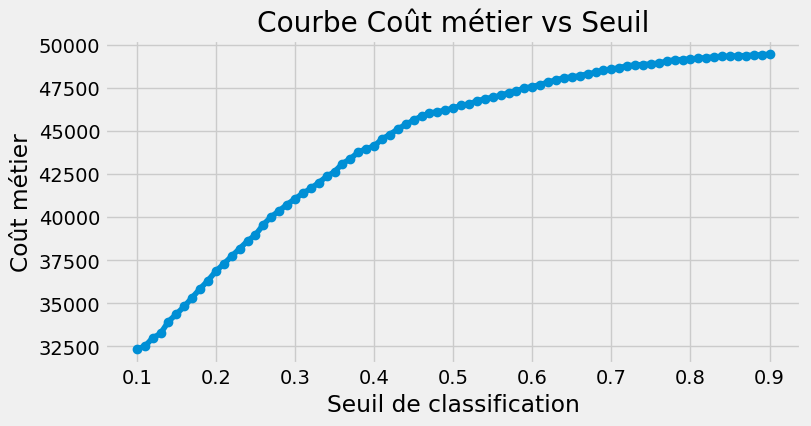

In [98]:
evaluate_model_with_cv_and_optuna(
    model_class= XGBClassifier,
    model_name="XGBoost",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_xgb,
    cv_splits=3  # Validation croisée rapide
)

🎯 Résultats sur le jeu de test

    Accuracy : 0.778

    Recall : 0.580

    ROC AUC : 0.762


📈 Résultats sur le jeu de train

    Accuracy : 0.811

    Recall : 0.784

    ROC AUC : 0.883

📌 Le recall est nettement meilleur en train, ce qui suggère que le modèle identifie mieux les mauvais payeurs sur l’entraînement que sur les données réelles (test).

📌 L’écart en ROC AUC est également significatif (>0.1), ce qui montre que le modèle s'adapte mieux au train qu'aux données non vues.

✅ En revanche, l’accuracy reste proche entre les deux ensembles, ce qui montre que le modèle ne se trompe pas de manière globale, mais perd en qualité pour détecter la classe minoritaire (les mauvais payeurs).

Le modèle XGBoost montre des signes modérés d’overfitting, surtout en recall et AUC

In [99]:
#Gestion de l'overfitting, affiniment des parametres

In [100]:
param_space_xgb4 = {
    "n_estimators": ("int", 50, 100),              # diminue max pour temps
    "max_depth": ("int", 3, 4),                    # profondeur limitée
    "learning_rate": ("float", 0.05, 0.1),         # plus stable
    "subsample": ("float", 0.5, 0.9),              # moins de surapprentissage
    "colsample_bytree": ("float", 0.5, 0.9),
    "gamma": ("float", 1.0, 5.0),                  # évite les splits superflus
    "reg_lambda": ("float", 1.0, 10.0),            # pénalité L2 plus forte
    "reg_alpha": ("float", 0.1, 10.0),             # pénalité L1 plus forte
}

[I 2025-08-04 14:01:08,688] A new study created in memory with name: no-name-afbb5db7-6f5e-48ad-af6b-01682d4b2281
[I 2025-08-04 14:01:27,510] Trial 0 finished with value: 197619.0 and parameters: {'n_estimators': 56, 'max_depth': 4, 'learning_rate': 0.08767320356885147, 'subsample': 0.5926515735843357, 'colsample_bytree': 0.5634702472013883, 'gamma': 4.208656042462294, 'reg_lambda': 1.9353450377989794, 'reg_alpha': 1.403779151445433}. Best is trial 0 with value: 197619.0.
[I 2025-08-04 14:01:49,380] Trial 1 finished with value: 196706.0 and parameters: {'n_estimators': 92, 'max_depth': 3, 'learning_rate': 0.09831914353194306, 'subsample': 0.5453345425169142, 'colsample_bytree': 0.7536311142140422, 'gamma': 2.9871902956482415, 'reg_lambda': 9.69345719702122, 'reg_alpha': 2.7796186790509747}. Best is trial 1 with value: 196706.0.
[I 2025-08-04 14:02:08,101] Trial 2 finished with value: 198730.0 and parameters: {'n_estimators': 61, 'max_depth': 3, 'learning_rate': 0.06314658232680671, 'su

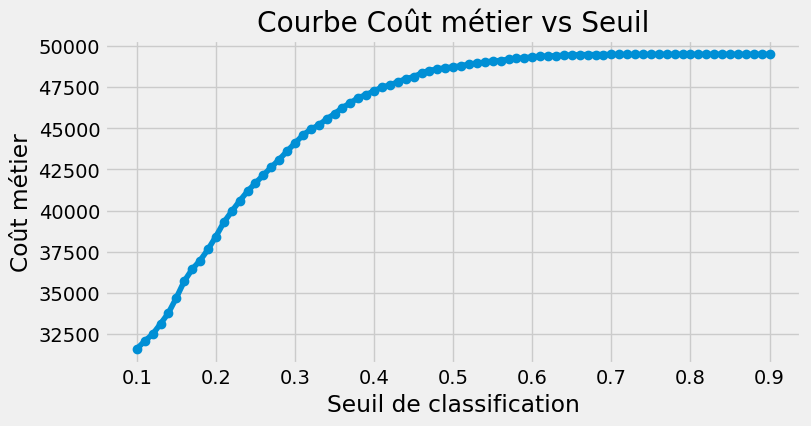

In [101]:
evaluate_model_with_cv_and_optuna(
    model_class= XGBClassifier,
    model_name="XGBoost",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_xgb4,
    cv_splits=3  # Validation croisée rapide
)

In [ ]:
#Moins d'overfitting ?

In [102]:
#LOGREG

In [107]:
param_space_logreg = {
    "C": ("float", 1e-5, 10.0),
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "class_weight": ["balanced"]
}


[I 2025-08-04 15:32:55,125] A new study created in memory with name: no-name-60aa7830-e6ed-4d87-a31c-f938acfbba26
[I 2025-08-04 15:33:26,969] Trial 0 finished with value: 130060.0 and parameters: {'C': 0.03004010917884047, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 0 with value: 130060.0.
[I 2025-08-04 15:33:59,025] Trial 1 finished with value: 129581.0 and parameters: {'C': 6.431606600362973, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 1 with value: 129581.0.
[I 2025-08-04 15:34:30,571] Trial 2 finished with value: 129111.0 and parameters: {'C': 1.7967187292563023, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 2 with value: 129111.0.
[I 2025-08-04 15:35:01,492] Trial 3 finished with value: 129633.0 and parameters: {'C': 3.241801935317519, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 2 with value: 129111.0.
[I 2025-08-04 15:35:33,055] Trial 4 finishe

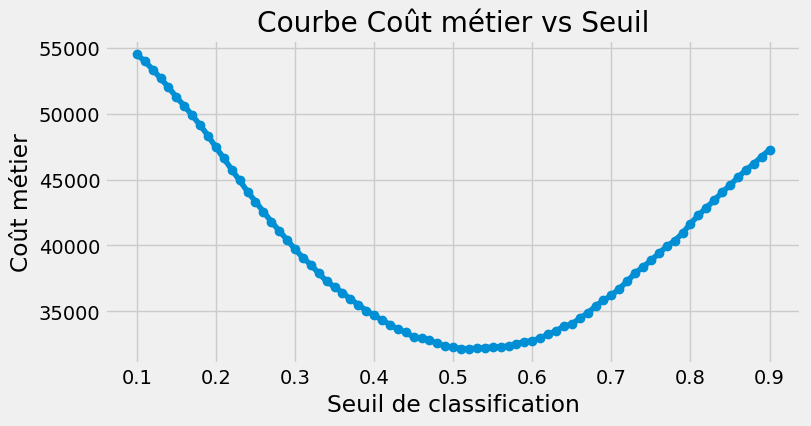

In [108]:
from sklearn.linear_model import LogisticRegression


evaluate_model_with_cv_and_optuna(
    model_class=LogisticRegression,
    model_name="LogisticRegression",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_logreg
)

In [109]:
#Analyse de l'overfit